In [2]:
import math
import pandas as pd
from collections import Counter
from scipy.stats import pearsonr, spearmanr

# Function to calculate dinucleotide perplexity
def calculate_dinucleotide_perplexity(seq):
    dinucleotides = [seq[i:i+2] for i in range(len(seq) - 1)]
    counts = Counter(dinucleotides)
    total = sum(counts.values())
    
    if total == 0:
        return float('inf')
    
    probabilities = {dinucleotide: count / total for dinucleotide, count in counts.items()}
    entropy = -sum(p * math.log2(p) for p in probabilities.values() if p > 0)
    perplexity = 2 ** entropy
    return perplexity

# Function to process the yeast.txt file and calculate perplexity correlations for Is_Constitutive=1 and 0
def process_yeast_file(filename):
    results = []

    # Read the file and process the columns
    df = pd.read_csv(filename, sep='\t')

    # Separate the sequences based on 'Is_Constitutive' column
    group_1 = df[df['Is_Constitutive'] == 1]
    group_0 = df[df['Is_Constitutive'] == 0]

    # Function to process a group (either 1 or 0)
    def process_group(group, group_name):
        sequences = group['200bp_Flanked_TSS_Sequence']
        emax_values = group['E_max']

        # Calculate dinucleotide perplexity for each sequence
        dinucleotide_perplexities = [calculate_dinucleotide_perplexity(seq) for seq in sequences]

        # Calculate Pearson and Spearman correlations between dinucleotide perplexity and E_max values
        if len(dinucleotide_perplexities) > 1 and len(emax_values) > 1:
            pearson_corr, pearson_p = pearsonr(dinucleotide_perplexities, emax_values)
            spearman_corr, spearman_p = spearmanr(dinucleotide_perplexities, emax_values)
        else:
            pearson_corr, pearson_p = None, None
            spearman_corr, spearman_p = None, None

        # Store the results
        results.append({
            'Group': group_name,
            'Pearson Correlation': pearson_corr if pearson_p and pearson_p < 0.001 else "not significant",
            'Spearman Correlation': spearman_corr if spearman_p and spearman_p < 0.001 else "not significant"
        })

    # Process each group separately
    process_group(group_1, 'Constitutive (Is_Constitutive=1)')
    process_group(group_0, 'Non-Constitutive (Is_Constitutive=0)')

    # Save results to an Excel file
    results_df = pd.DataFrame(results)
    output_file = "yeast_perplexity_correlations.xlsx"
    results_df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")

# Run the function on the yeast.txt file
process_yeast_file("yeast.txt")


Results saved to yeast_perplexity_correlations.xlsx


In [17]:
import math
import pandas as pd
from collections import Counter
from scipy.stats import pearsonr, spearmanr

# Function to calculate dinucleotide perplexity
def calculate_dinucleotide_perplexity(seq):
    dinucleotides = [seq[i:i+2] for i in range(len(seq) - 1)]
    counts = Counter(dinucleotides)
    total = sum(counts.values())
    
    if total == 0:
        return float('inf')
    
    probabilities = {dinucleotide: count / total for dinucleotide, count in counts.items()}
    entropy = -sum(p * math.log2(p) for p in probabilities.values() if p > 0)
    perplexity = 2 ** entropy
    return perplexity

# Function to process specific regions from sequences
def calculate_region_perplexity(seq, start, end):
    region_seq = seq[start-1:end]  # Extract the region based on 1-based indexing
    return calculate_dinucleotide_perplexity(region_seq)

# Function to process the yeast.txt file and calculate perplexity correlations for different regions
def process_yeast_file(filename):
    results = []
    
    # Define combinations of regions with varying lengths (minimum 20nt)
    regions = [
        (1, 50), (100, 150), (190, 200),(200, 250), (350, 400), (180, 200), (190, 210), (180, 220), (170, 230), 
        (160, 240), (170, 200),(160, 240), (150,200),(140, 180)
    ]

    # Read the file and process the columns
    df = pd.read_csv(filename, sep='\t')

    # Separate the sequences based on 'Is_Constitutive' column
    group_1 = df[df['Is_Constitutive'] == 1]
    group_0 = df[df['Is_Constitutive'] == 0]

    # Function to process a group (either 1 or 0)
    def process_group(group, group_name):
        sequences = group['200bp_Flanked_TSS_Sequence']
        emax_values = group['E_max']

        for (start, end) in regions:
            region_name = f"{start}-{end}"
            if end - start < 20:  # Ensure the region length is at least 20
                continue

            # Calculate dinucleotide perplexity for each sequence in the specific region
            perplexities = [calculate_region_perplexity(seq, start, end) for seq in sequences]

            # Calculate Pearson and Spearman correlations between dinucleotide perplexity and E_max values
            if len(perplexities) > 1 and len(emax_values) > 1:
                pearson_corr, pearson_p = pearsonr(perplexities, emax_values)
                spearman_corr, spearman_p = spearmanr(perplexities, emax_values)
            else:
                pearson_corr, pearson_p = None, None
                spearman_corr, spearman_p = None, None

            # Store the results
            results.append({
                'Group': group_name,
                'Region': region_name,
                'Region Length': end - start + 1,
                'Pearson Correlation': pearson_corr if pearson_p and pearson_p < 0.001 else "not significant",
                'Spearman Correlation': spearman_corr if spearman_p and spearman_p < 0.001 else "not significant"
            })

    # Process each group separately
    process_group(group_1, 'Constitutive (Is_Constitutive=1)')
    process_group(group_0, 'Non-Constitutive (Is_Constitutive=0)')

    # Save results to an Excel file
    results_df = pd.DataFrame(results)
    output_file = "yeast_perplexity_correlations_by_regions_and_lengths.xlsx"
    results_df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")

# Run the function on the yeast.txt file
process_yeast_file("yeast.txt")


Results saved to yeast_perplexity_correlations_by_regions_and_lengths.xlsx


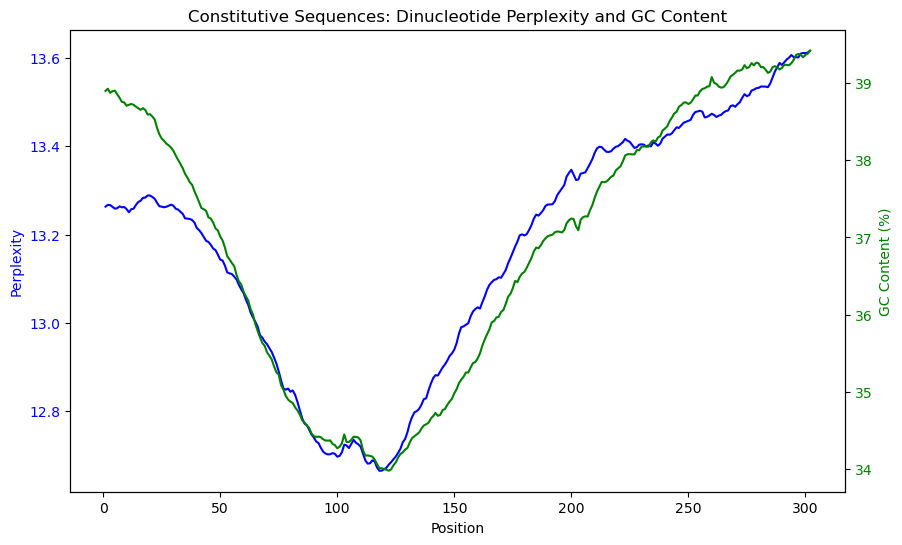

Results saved to yeast_Constitutive_results.txt


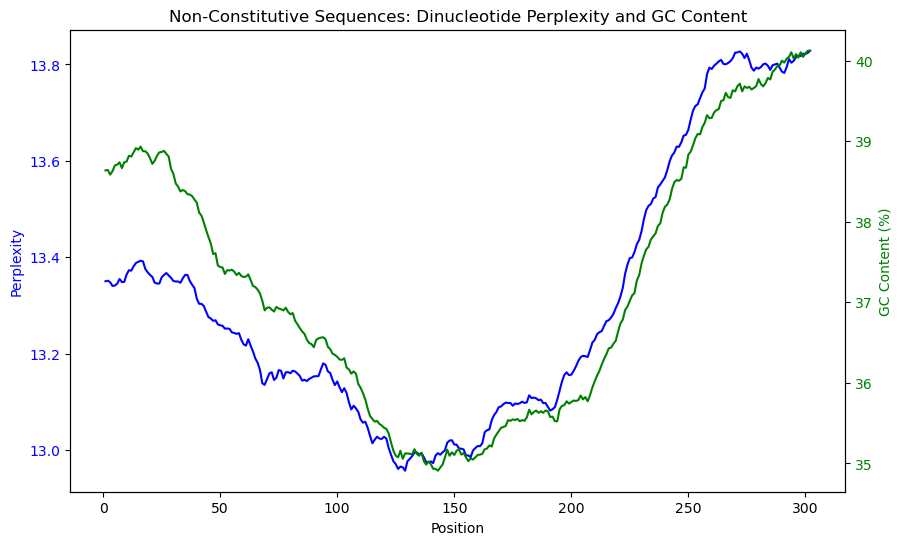

Results saved to yeast_Non-Constitutive_results.txt


In [7]:
import glob
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences and classify them into constitutive and non-constitutive groups
def read_sequences_from_file(filename):
    constitutive_sequences = []
    non_constitutive_sequences = []
    
    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue  # Skip incomplete lines
            
            sequence = parts[3]
            is_constitutive = int(parts[2])  # 1 for constitutive, 0 for non-constitutive
            
            if len(sequence) >= 20:  # Ensure sequence has minimum required length
                if is_constitutive == 1:
                    constitutive_sequences.append(sequence)
                else:
                    non_constitutive_sequences.append(sequence)

    return constitutive_sequences, non_constitutive_sequences

# Function to calculate dinucleotide perplexity and GC content
def calculate_perplexity_and_gc(seq, window_size=10):
    seq_len = len(seq)
    if seq_len < window_size:
        return np.array([]), np.array([])

    num_windows = seq_len - window_size + 1
    perplexities = np.zeros(num_windows)
    gc_percentages = np.zeros(num_windows)

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]

    for i in range(num_windows):
        window_dinucleotides = dinucleotides[i:i + window_size - 1]
        dinucleotide_counts = Counter(window_dinucleotides).values()
        probabilities = np.array(list(dinucleotide_counts)) / (window_size - 1)

        entropy = -np.sum(probabilities * np.log2(probabilities))
        perplexities[i] = 2 ** entropy

        window = seq[i:i + window_size]
        gc_count = window.count('G') + window.count('C')
        gc_percentages[i] = (gc_count / window_size) * 100

    return perplexities, gc_percentages

# Function to save results to a text file
def save_results_to_text(filename, group, x_values, avg_perplexity, avg_gc_content):
    output_filename = f"{os.path.splitext(filename)[0]}_{group}_results.txt"
    np.savetxt(
        output_filename,
        np.column_stack((x_values, avg_perplexity, avg_gc_content)),
        fmt="%d\t%.4f\t%.2f",
        header="Position\tPerplexity\tGC Content (%)",
        comments=""
    )
    print(f"Results saved to {output_filename}")

# Function to process the constitutive and non-constitutive sequences
def process_and_plot_sequences(sequences, group, window_size=10):
    if not sequences:
        print(f"No sequences found for {group}.")
        return

    num_positions = len(sequences[0]) - window_size + 1
    total_perplexities = np.zeros(num_positions)
    total_gc_content = np.zeros(num_positions)

    # Process each sequence
    for sequence in sequences:
        perplexities, gc_content = calculate_perplexity_and_gc(sequence, window_size)
        total_perplexities += perplexities
        total_gc_content += gc_content

    # Calculate positional averages
    sequence_count = len(sequences)
    avg_perplexity = total_perplexities / sequence_count
    avg_gc_content = total_gc_content / sequence_count
    x_values = np.arange(1, num_positions + 1)

    # Plot Perplexity and GC Content
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.set_xlabel('Position')
    ax1.set_ylabel('Perplexity', color='blue')
    ax1.plot(x_values, avg_perplexity, color='blue', label='Perplexity')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('GC Content (%)', color='green')
    ax2.plot(x_values, avg_gc_content, color='green', label='GC Content')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f'{group} Sequences: Dinucleotide Perplexity and GC Content')
    plt.show()

    # Save results to text file
    save_results_to_text('yeast.txt', group, x_values, avg_perplexity, avg_gc_content)

# Main function to read the file, separate sequences, and process them
def process_yeast_file(filename, window_size=10):
    # Read the sequences and classify into constitutive and non-constitutive
    constitutive_sequences, non_constitutive_sequences = read_sequences_from_file(filename)

    # Process and plot constitutive sequences
    process_and_plot_sequences(constitutive_sequences, "Constitutive", window_size)

    # Process and plot non-constitutive sequences
    process_and_plot_sequences(non_constitutive_sequences, "Non-Constitutive", window_size)

# Run the analysis for the yeast.txt file
process_yeast_file('yeast.txt', window_size=100)  # You can change the window size as needed


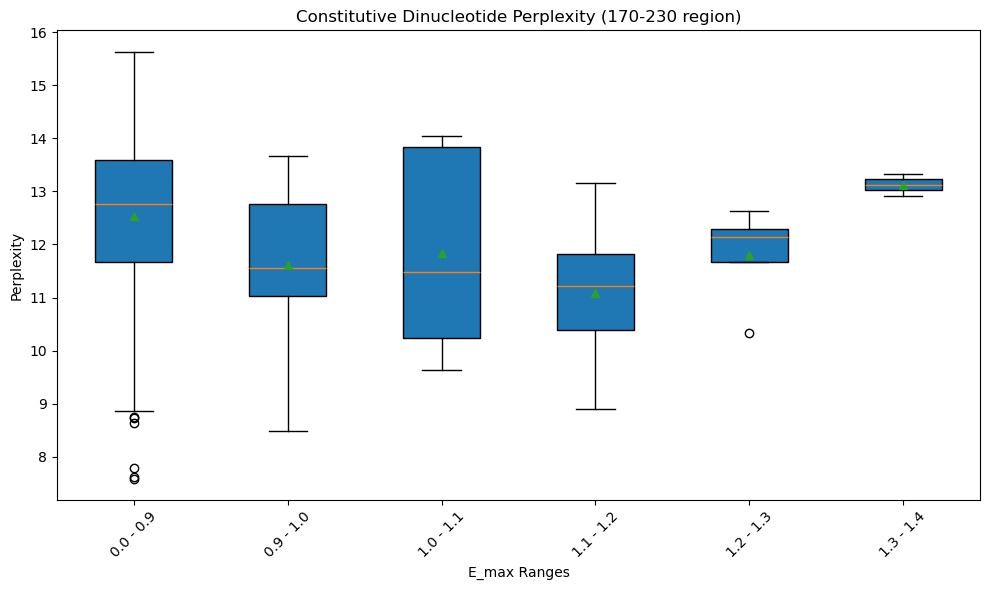

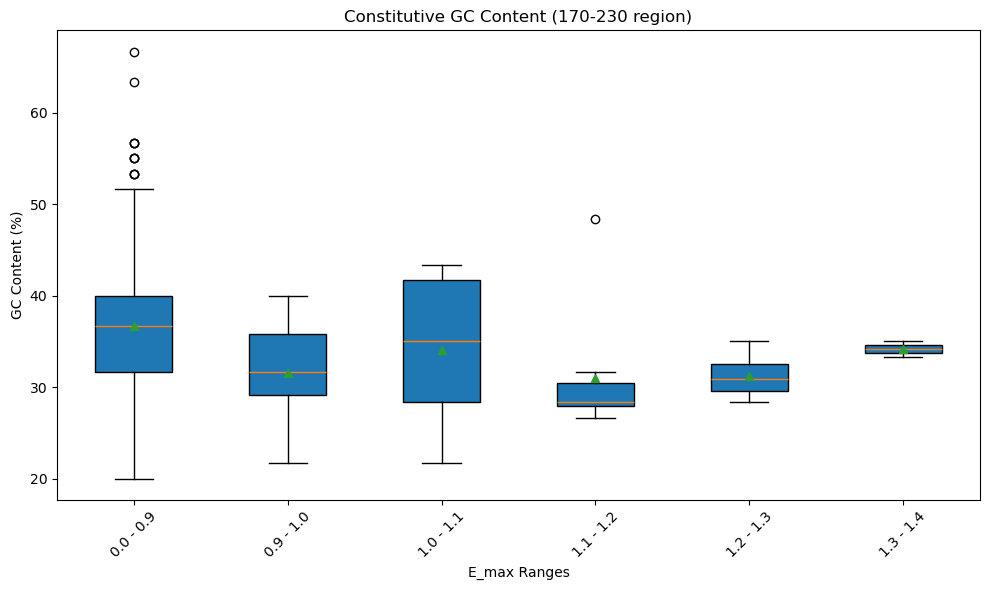

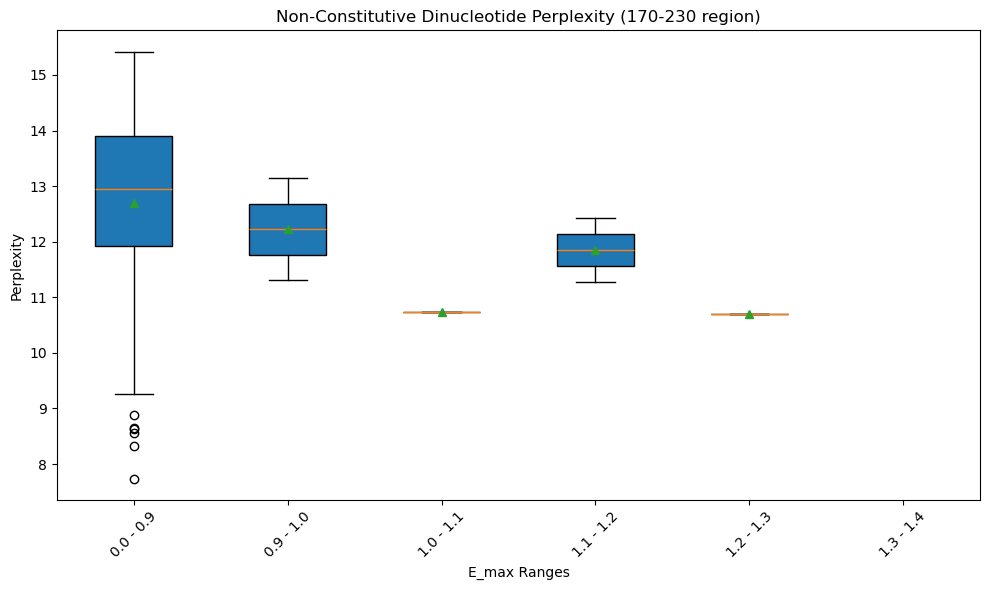

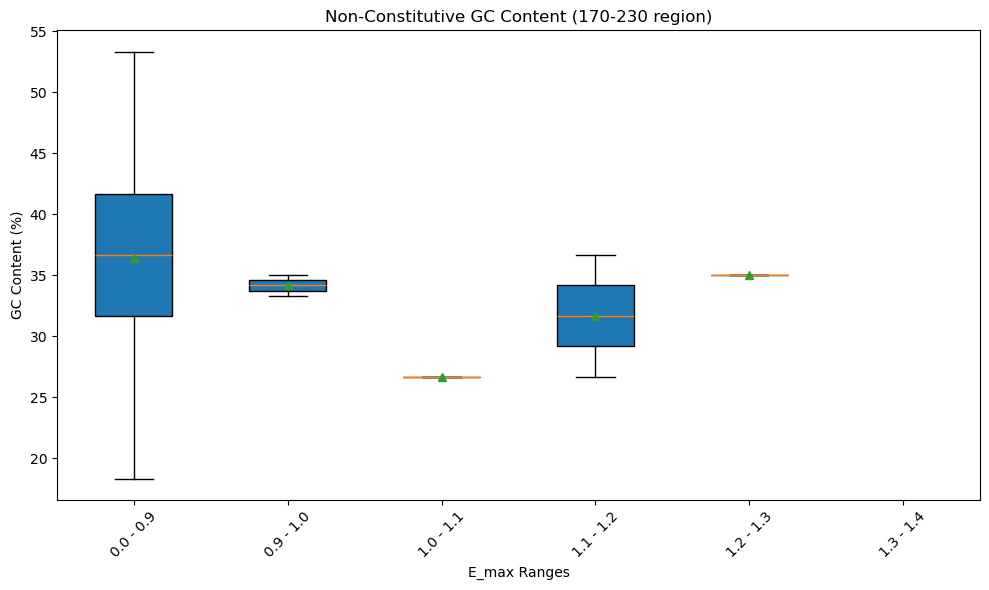

In [14]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_sequences_170_230 = []
    non_constitutive_sequences_170_230 = []
    constitutive_emax_values = []
    non_constitutive_emax_values = []
    
    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            sequence = parts[3][169:230]  # Extract region from position 170 to 230 (Python 0-based indexing)
            emax = float(parts[1])
            is_constitutive = int(parts[2])

            if len(sequence) >= 60:  # Ensure the sequence region has the required length
                if is_constitutive == 1:
                    constitutive_sequences_170_230.append(sequence)
                    constitutive_emax_values.append(emax)
                else:
                    non_constitutive_sequences_170_230.append(sequence)
                    non_constitutive_emax_values.append(emax)

    return constitutive_sequences_170_230, constitutive_emax_values, non_constitutive_sequences_170_230, non_constitutive_emax_values

# Function to calculate dinucleotide perplexity and GC content for a sequence
def calculate_perplexity_and_gc(seq, window_size=60):
    seq_len = len(seq)
    if seq_len < window_size:
        return None, None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    
    # Calculate dinucleotide probabilities
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (window_size - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    # Calculate GC content
    gc_count = seq.count('G') + seq.count('C')
    gc_percentage = (gc_count / window_size) * 100

    return perplexity, gc_percentage

# Function to categorize E_max values into predefined ranges
def bin_sequences_by_emax(emax_values, bin_ranges):
    bins = np.digitize(emax_values, bin_ranges)
    return bins, bin_ranges

# Function to process the sequences and plot results
def process_sequences_and_plot(filename):
    # Read sequences and E_max values
    const_sequences, const_emax_values, non_const_sequences, non_const_emax_values = read_sequences_and_emax(filename)
    
    # Define E_max value ranges
    bin_ranges = [0, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
    
    # Bin the sequences based on E_max value ranges
    const_bins, _ = bin_sequences_by_emax(const_emax_values, bin_ranges)
    non_const_bins, _ = bin_sequences_by_emax(non_const_emax_values, bin_ranges)

    # Initialize lists for perplexity and GC content per bin
    const_perplexity_bins = [[] for _ in range(len(bin_ranges) - 1)]
    const_gc_content_bins = [[] for _ in range(len(bin_ranges) - 1)]
    non_const_perplexity_bins = [[] for _ in range(len(bin_ranges) - 1)]
    non_const_gc_content_bins = [[] for _ in range(len(bin_ranges) - 1)]

    # Calculate perplexity and GC content for constitutive sequences and assign to bins
    for seq, bin_idx in zip(const_sequences, const_bins):
        if 1 <= bin_idx <= len(bin_ranges) - 1:
            perplexity, gc_content = calculate_perplexity_and_gc(seq)
            if perplexity is not None and gc_content is not None:
                const_perplexity_bins[bin_idx - 1].append(perplexity)
                const_gc_content_bins[bin_idx - 1].append(gc_content)

    # Calculate perplexity and GC content for non-constitutive sequences and assign to bins
    for seq, bin_idx in zip(non_const_sequences, non_const_bins):
        if 1 <= bin_idx <= len(bin_ranges) - 1:
            perplexity, gc_content = calculate_perplexity_and_gc(seq)
            if perplexity is not None and gc_content is not None:
                non_const_perplexity_bins[bin_idx - 1].append(perplexity)
                non_const_gc_content_bins[bin_idx - 1].append(gc_content)

    # Plot Perplexity boxplot for constitutive sequences
    plt.figure(figsize=(10, 6))
    plt.boxplot(const_perplexity_bins, patch_artist=True, showmeans=True)
    plt.title('Constitutive Dinucleotide Perplexity (170-230 region)')
    plt.xlabel('E_max Ranges')
    plt.ylabel('Perplexity')
    plt.xticks(range(1, len(bin_ranges)), [f'{bin_ranges[i]:.1f} - {bin_ranges[i + 1]:.1f}' for i in range(len(bin_ranges) - 1)], rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot GC content boxplot for constitutive sequences
    plt.figure(figsize=(10, 6))
    plt.boxplot(const_gc_content_bins, patch_artist=True, showmeans=True)
    plt.title('Constitutive GC Content (170-230 region)')
    plt.xlabel('E_max Ranges')
    plt.ylabel('GC Content (%)')
    plt.xticks(range(1, len(bin_ranges)), [f'{bin_ranges[i]:.1f} - {bin_ranges[i + 1]:.1f}' for i in range(len(bin_ranges) - 1)], rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Perplexity boxplot for non-constitutive sequences
    plt.figure(figsize=(10, 6))
    plt.boxplot(non_const_perplexity_bins, patch_artist=True, showmeans=True)
    plt.title('Non-Constitutive Dinucleotide Perplexity (170-230 region)')
    plt.xlabel('E_max Ranges')
    plt.ylabel('Perplexity')
    plt.xticks(range(1, len(bin_ranges)), [f'{bin_ranges[i]:.1f} - {bin_ranges[i + 1]:.1f}' for i in range(len(bin_ranges) - 1)], rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot GC content boxplot for non-constitutive sequences
    plt.figure(figsize=(10, 6))
    plt.boxplot(non_const_gc_content_bins, patch_artist=True, showmeans=True)
    plt.title('Non-Constitutive GC Content (170-230 region)')
    plt.xlabel('E_max Ranges')
    plt.ylabel('GC Content (%)')
    plt.xticks(range(1, len(bin_ranges)), [f'{bin_ranges[i]:.1f} - {bin_ranges[i + 1]:.1f}' for i in range(len(bin_ranges) - 1)], rotation=45)
    plt.tight_layout()
    plt.show()

# Run the analysis for yeast.txt
process_sequences_and_plot('yeast.txt')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\2551616204.py:99: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', label='Perplexity')


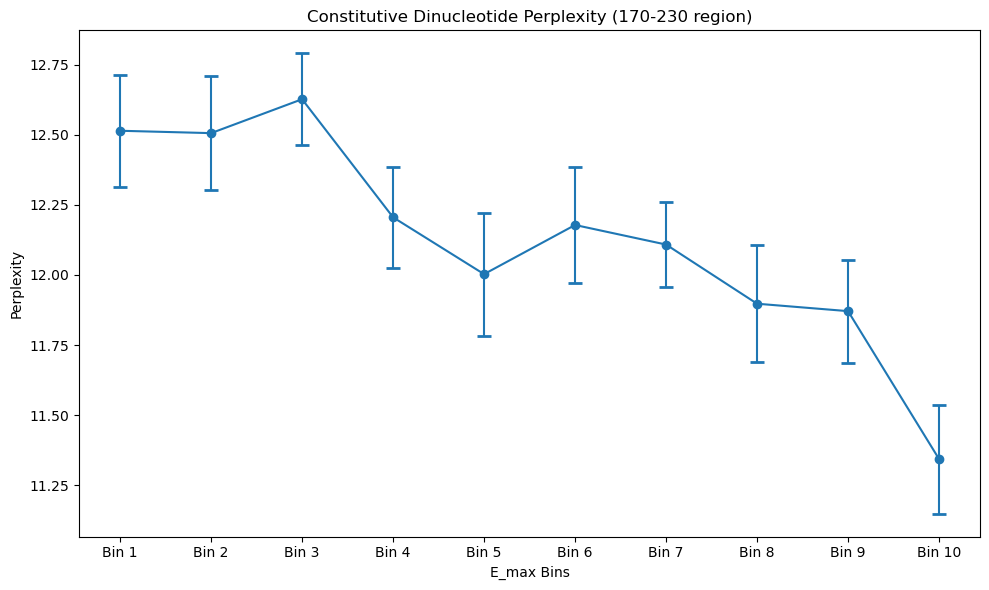

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\2551616204.py:109: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', color='r', label='GC Content')


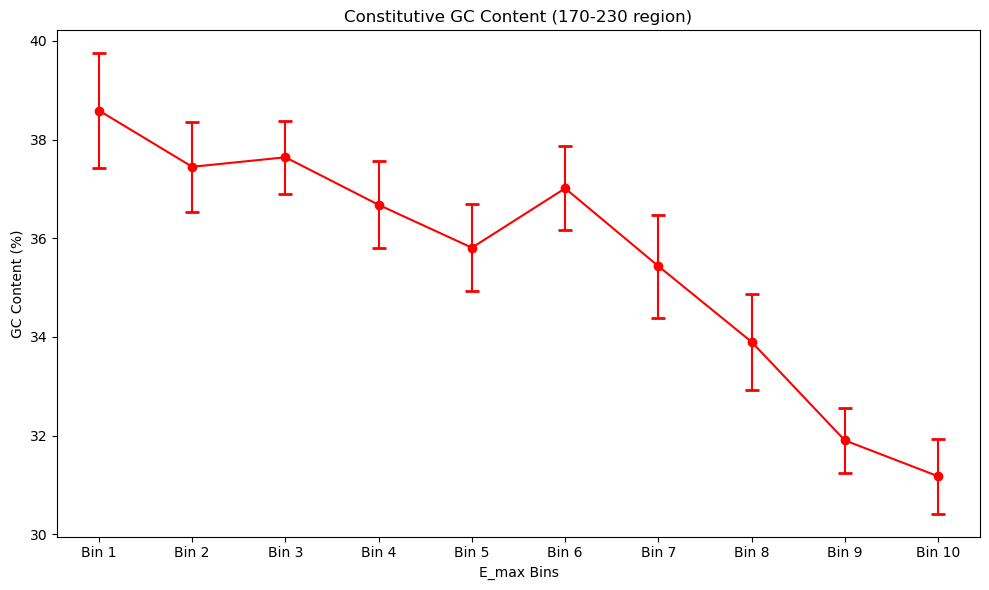

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\2551616204.py:99: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', label='Perplexity')


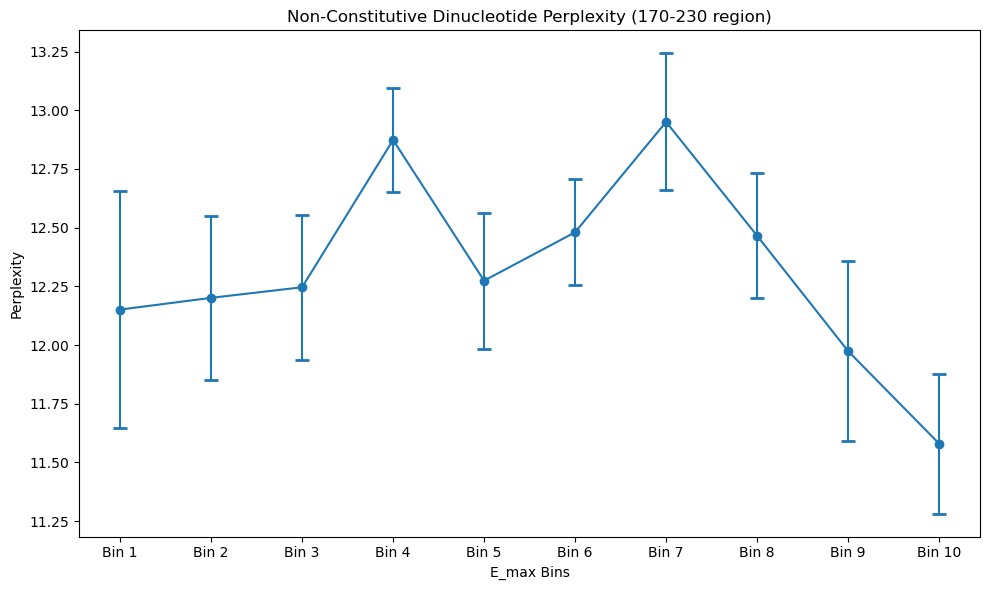

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\2551616204.py:109: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', color='r', label='GC Content')


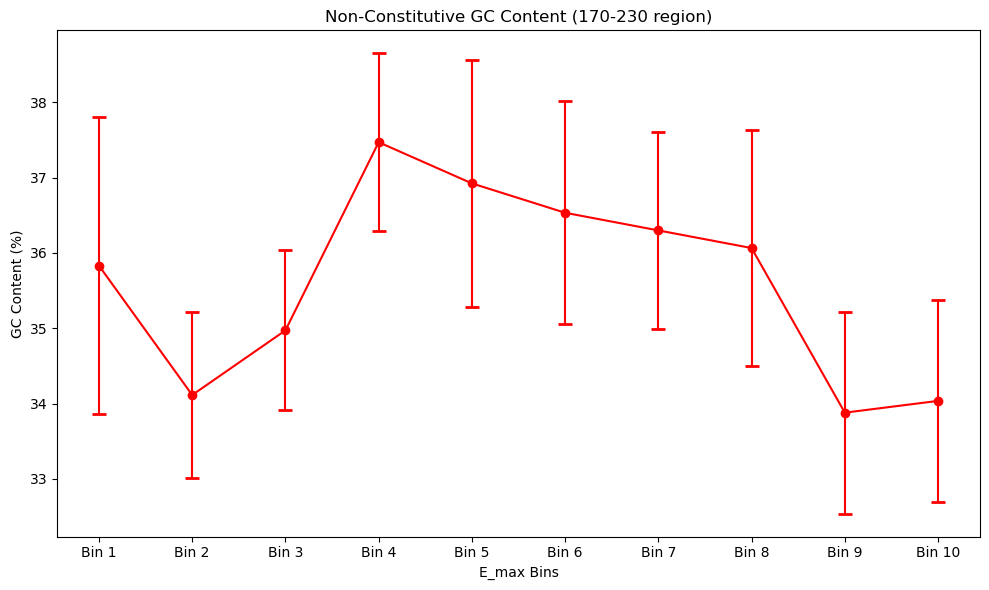

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            sequence = parts[3][169:230]  # Extract region from position 170 to 230 (Python 0-based indexing)
            emax = float(parts[1])
            is_constitutive = int(parts[2])

            if len(sequence) >= 60:  # Ensure the sequence region has the required length
                if is_constitutive == 1:
                    constitutive_data.append((sequence, emax))
                else:
                    non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity and GC content for a sequence
def calculate_perplexity_and_gc(seq):
    seq_len = len(seq)
    if seq_len < 60:
        return None, None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    
    # Calculate dinucleotide probabilities
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    # Calculate GC content
    gc_count = seq.count('G') + seq.count('C')
    gc_percentage = (gc_count / seq_len) * 100

    return perplexity, gc_percentage

# Function to bin data into 10 equal-sized bins
def create_bins(data):
    data.sort(key=lambda x: x[1])  # Sort data by E_max values
    total_length = len(data)
    bin_size = total_length // 10  # Calculate bin size
    bins = [data[i * bin_size:(i + 1) * bin_size] for i in range(10)]

    # If there are excess data points, randomly discard them
    remainder = total_length % 10
    if remainder > 0:
        excess_data = data[-remainder:]
        for i in range(remainder):
            random_index = random.randint(0, 9)
            bins[random_index].append(excess_data[i])

    return bins

# Function to calculate mean, standard error, and separate perplexity and GC content
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []
    gc_means = []
    gc_errors = []

    for bin_data in bins:
        perplexities = []
        gc_contents = []
        for seq, _ in bin_data:
            perplexity, gc_content = calculate_perplexity_and_gc(seq)
            if perplexity is not None and gc_content is not None:
                perplexities.append(perplexity)
                gc_contents.append(gc_content)

        if perplexities and gc_contents:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))
            gc_means.append(np.mean(gc_contents))
            gc_errors.append(np.std(gc_contents) / np.sqrt(len(gc_contents)))

    return perplexity_means, perplexity_errors, gc_means, gc_errors

# Function to plot the data
def plot_statistics(perplexity_means, perplexity_errors, gc_means, gc_errors, title_prefix):
    # Plot Perplexity
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', label='Perplexity')
    plt.title(f'{title_prefix} Dinucleotide Perplexity (170-230 region)')
    plt.xlabel('E_max Bins')
    plt.ylabel('Perplexity')
    plt.xticks(range(1, 11), [f'Bin {i}' for i in range(1, 11)])
    plt.tight_layout()
    plt.show()

    # Plot GC Content
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', color='r', label='GC Content')
    plt.title(f'{title_prefix} GC Content (170-230 region)')
    plt.xlabel('E_max Bins')
    plt.ylabel('GC Content (%)')
    plt.xticks(range(1, 11), [f'Bin {i}' for i in range(1, 11)])
    plt.tight_layout()
    plt.show()

# Function to process the sequences and plot results
def process_sequences_and_plot(filename):
    # Read sequences and E_max values
    const_data, non_const_data = read_sequences_and_emax(filename)
    
    # Create bins for constitutive and non-constitutive data
    const_bins = create_bins(const_data)
    non_const_bins = create_bins(non_const_data)

    # Calculate statistics for constitutive sequences
    const_perplexity_means, const_perplexity_errors, const_gc_means, const_gc_errors = calculate_bin_statistics(const_bins)
    plot_statistics(const_perplexity_means, const_perplexity_errors, const_gc_means, const_gc_errors, 'Constitutive')

    # Calculate statistics for non-constitutive sequences
    non_const_perplexity_means, non_const_perplexity_errors, non_const_gc_means, non_const_gc_errors = calculate_bin_statistics(non_const_bins)
    plot_statistics(non_const_perplexity_means, non_const_perplexity_errors, non_const_gc_means, non_const_gc_errors, 'Non-Constitutive')

# Run the analysis for yeast.txt
process_sequences_and_plot('yeast.txt')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\3936222357.py:99: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', label='Perplexity')


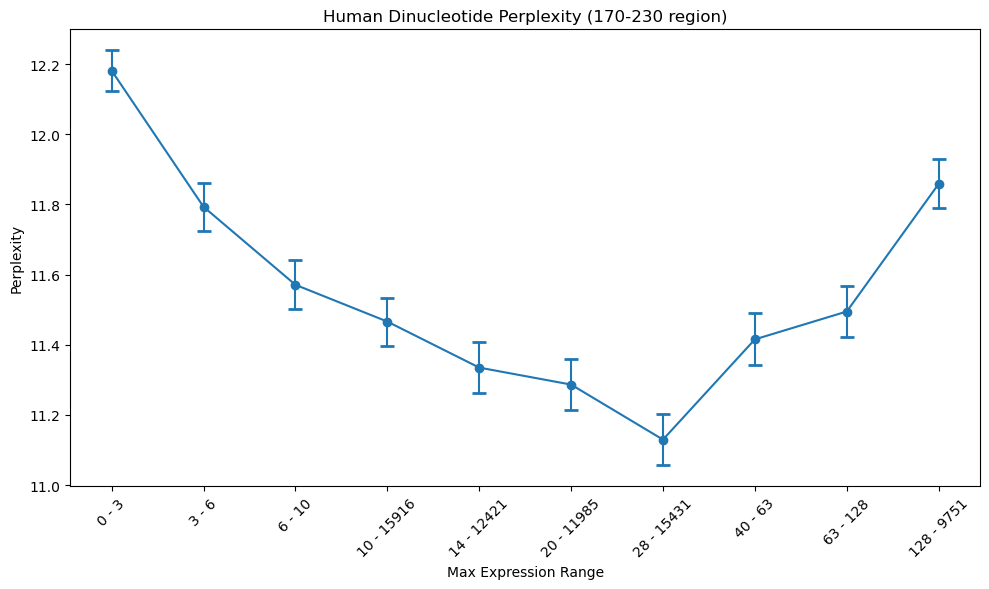

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\3936222357.py:109: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', color='r', label='GC Content')


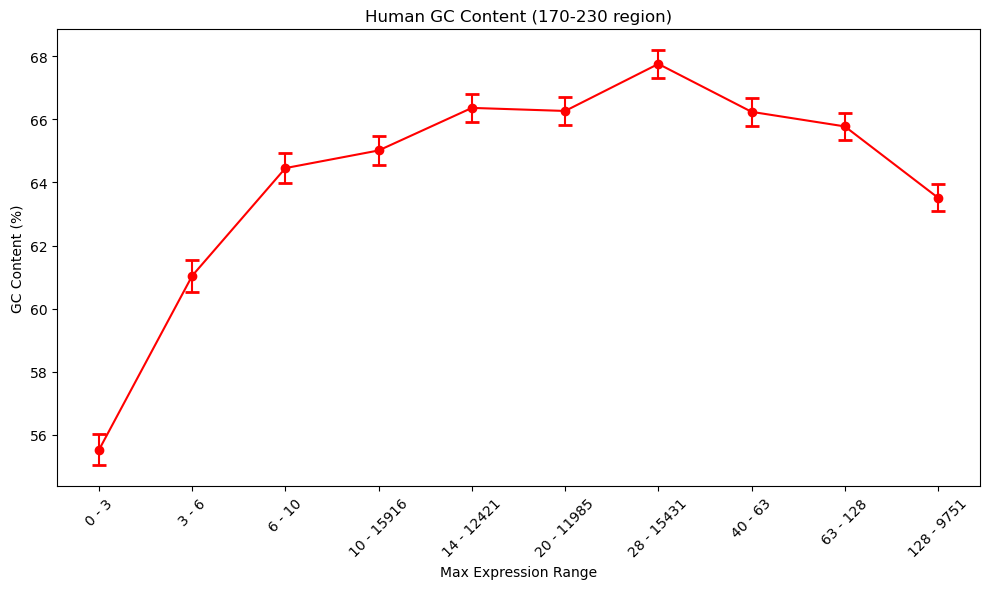

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

# Function to read sequences and Max_Expression values
def read_sequences_and_expression(filename):
    data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 2:
                continue

            sequence = parts[1][169:230]  # Extract region from position 170 to 230 (Python 0-based indexing)
            expression = float(parts[0])

            if len(sequence) >= 60:  # Ensure the sequence region has the required length
                data.append((sequence, expression))

    return data

# Function to calculate dinucleotide perplexity and GC content for a sequence
def calculate_perplexity_and_gc(seq):
    seq_len = len(seq)
    if seq_len < 60:
        return None, None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    
    # Calculate dinucleotide probabilities
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    # Calculate GC content
    gc_count = seq.count('G') + seq.count('C')
    gc_percentage = (gc_count / seq_len) * 100

    return perplexity, gc_percentage

# Function to bin data into 10 equal-sized bins
def create_bins(data):
    data.sort(key=lambda x: x[1])  # Sort data by Max_Expression values
    total_length = len(data)
    bin_size = total_length // 10  # Calculate bin size
    bins = [data[i * bin_size:(i + 1) * bin_size] for i in range(10)]

    # If there are excess data points, randomly discard them
    remainder = total_length % 10
    if remainder > 0:
        excess_data = data[-remainder:]
        for i in range(remainder):
            random_index = random.randint(0, 9)
            bins[random_index].append(excess_data[i])

    # Get min and max Max_Expression values for each bin
    bin_ranges = [(bin[0][1], bin[-1][1]) for bin in bins]
    return bins, bin_ranges

# Function to calculate mean, standard error, and separate perplexity and GC content
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []
    gc_means = []
    gc_errors = []

    for bin_data in bins:
        perplexities = []
        gc_contents = []
        for seq, _ in bin_data:
            perplexity, gc_content = calculate_perplexity_and_gc(seq)
            if perplexity is not None and gc_content is not None:
                perplexities.append(perplexity)
                gc_contents.append(gc_content)

        if perplexities and gc_contents:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))
            gc_means.append(np.mean(gc_contents))
            gc_errors.append(np.std(gc_contents) / np.sqrt(len(gc_contents)))

    return perplexity_means, perplexity_errors, gc_means, gc_errors

# Function to plot the data
def plot_statistics(perplexity_means, perplexity_errors, gc_means, gc_errors, bin_ranges, title_prefix):
    # Create x-axis labels based on Max_Expression ranges
    x_labels = [f'{int(low)} - {int(high)}' for low, high in bin_ranges]

    # Plot Perplexity
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', label='Perplexity')
    plt.title(f'{title_prefix} Dinucleotide Perplexity (170-230 region)')
    plt.xlabel('Max Expression Range')
    plt.ylabel('Perplexity')
    plt.xticks(range(1, 11), x_labels, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot GC Content
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, capthick=2, linestyle='-', marker='o', color='r', label='GC Content')
    plt.title(f'{title_prefix} GC Content (170-230 region)')
    plt.xlabel('Max Expression Range')
    plt.ylabel('GC Content (%)')
    plt.xticks(range(1, 11), x_labels, rotation=45)
    plt.tight_layout()
    plt.show()

# Function to process the sequences and plot results
def process_sequences_and_plot(filename):
    # Read sequences and Max Expression values
    data = read_sequences_and_expression(filename)
    
    # Create bins based on Max Expression values
    bins, bin_ranges = create_bins(data)

    # Calculate statistics for the bins
    perplexity_means, perplexity_errors, gc_means, gc_errors = calculate_bin_statistics(bins)
    plot_statistics(perplexity_means, perplexity_errors, gc_means, gc_errors, bin_ranges, 'Human')

# Run the analysis for human.txt
process_sequences_and_plot('human.txt')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\3302050927.py:102: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')


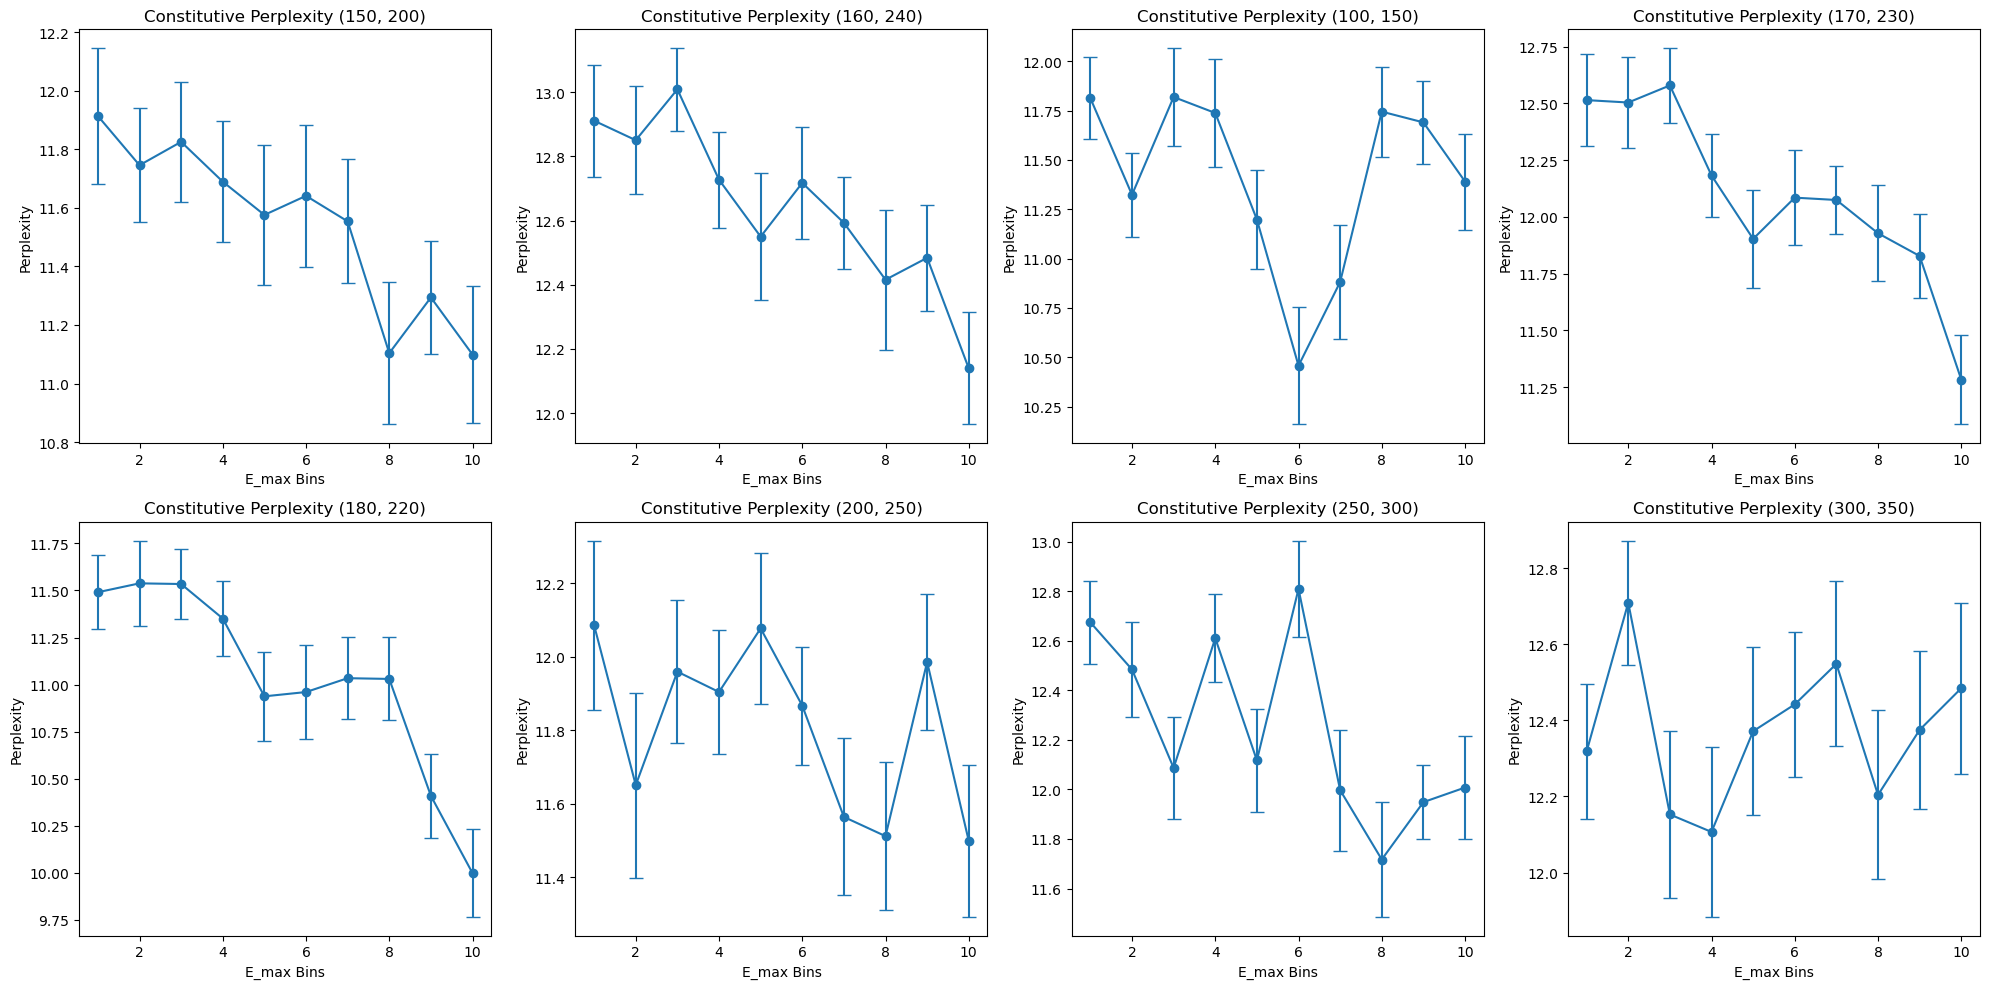

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8908\3302050927.py:115: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, linestyle='-', marker='o', color='r')


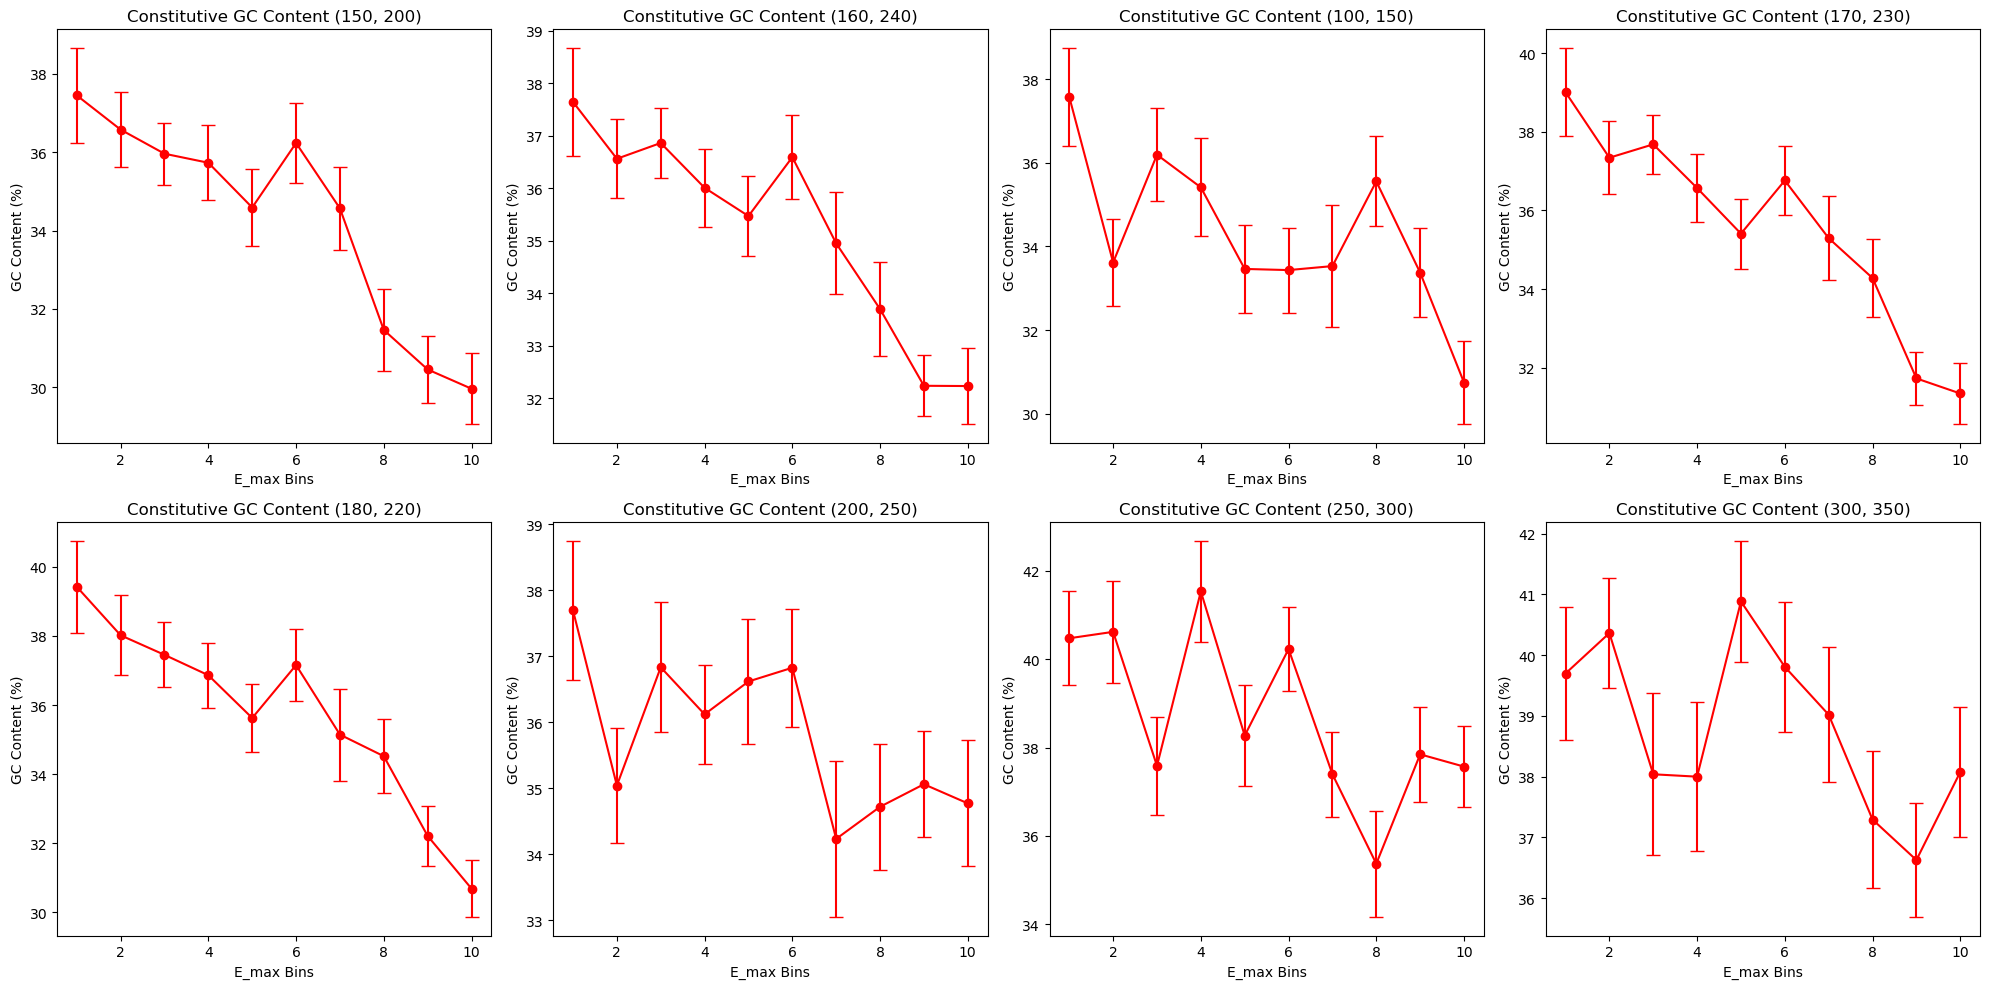

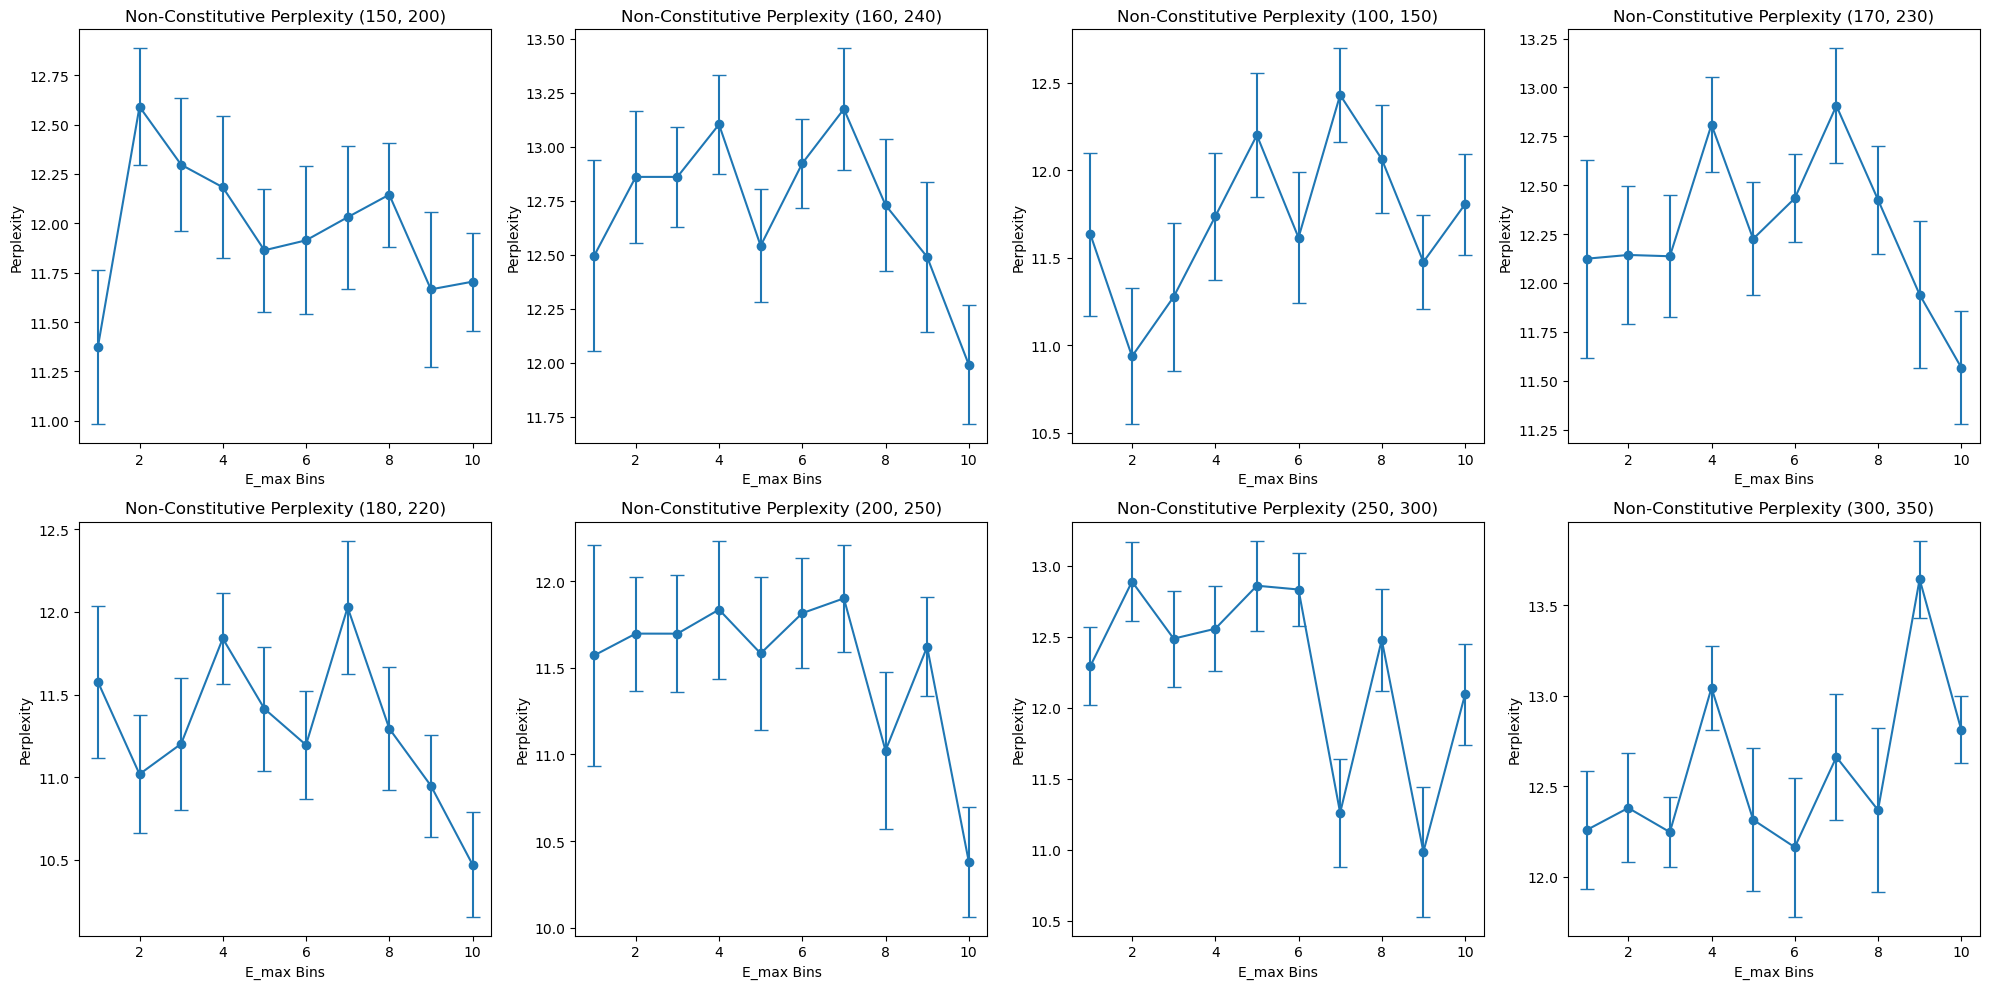

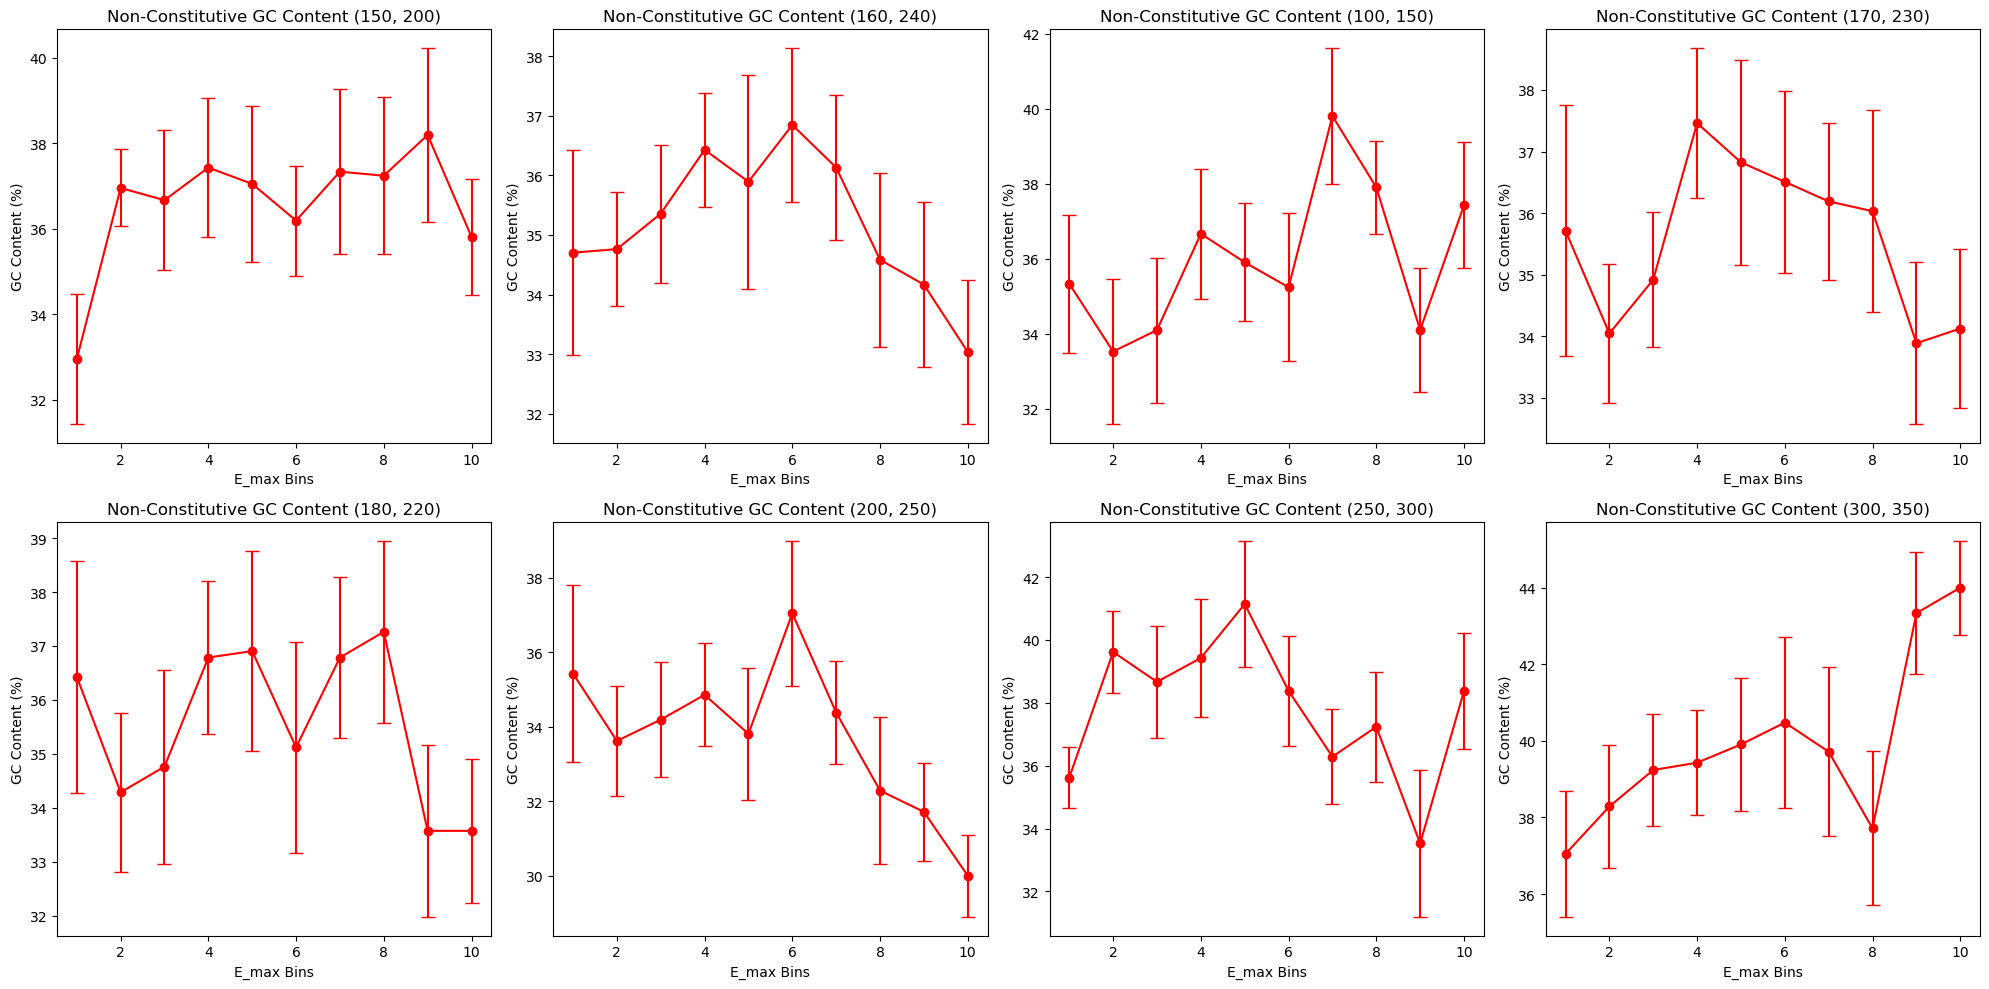

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            emax = float(parts[1])
            is_constitutive = int(parts[2])
            sequence = parts[3]

            if is_constitutive == 1:
                constitutive_data.append((sequence, emax))
            else:
                non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity and GC content for a sequence
def calculate_perplexity_and_gc(seq):
    seq_len = len(seq)
    if seq_len < 20:  # Ensure the sequence region has the minimum required length
        return None, None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    
    # Calculate dinucleotide probabilities
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    # Calculate GC content
    gc_count = seq.count('G') + seq.count('C')
    gc_percentage = (gc_count / seq_len) * 100

    return perplexity, gc_percentage

# Function to bin data into 10 equal-sized bins
def create_bins(data):
    data.sort(key=lambda x: x[1])  # Sort data by E_max values
    total_length = len(data)
    bin_size = total_length // 10  # Calculate bin size
    bins = [data[i * bin_size:(i + 1) * bin_size] for i in range(10)]

    # If there are excess data points, randomly discard them
    remainder = total_length % 10
    if remainder > 0:
        excess_data = data[-remainder:]
        for i in range(remainder):
            random_index = random.randint(0, 9)
            bins[random_index].append(excess_data[i])

    return bins

# Function to calculate mean, standard error, and separate perplexity and GC content
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []
    gc_means = []
    gc_errors = []

    for bin_data in bins:
        perplexities = []
        gc_contents = []
        for seq, _ in bin_data:
            perplexity, gc_content = calculate_perplexity_and_gc(seq)
            if perplexity is not None and gc_content is not None:
                perplexities.append(perplexity)
                gc_contents.append(gc_content)

        if perplexities and gc_contents:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))
            gc_means.append(np.mean(gc_contents))
            gc_errors.append(np.std(gc_contents) / np.sqrt(len(gc_contents)))

    return perplexity_means, perplexity_errors, gc_means, gc_errors

# Function to plot the data in a matrix of subplots for multiple regions
def plot_statistics_matrix(region_data, title_prefix):
    num_regions = len(region_data)
    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors, gc_means, gc_errors)) in enumerate(region_data.items()):
        # Perplexity subplot
        axs[idx].errorbar(range(1, 11), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')
        axs[idx].set_title(f'{title_prefix} Perplexity {region}')
        axs[idx].set_xlabel('E_max Bins')
        axs[idx].set_ylabel('Perplexity')

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors, gc_means, gc_errors)) in enumerate(region_data.items()):
        # GC Content subplot
        axs[idx].errorbar(range(1, 11), gc_means, yerr=gc_errors, fmt='o', capsize=5, linestyle='-', marker='o', color='r')
        axs[idx].set_title(f'{title_prefix} GC Content {region}')
        axs[idx].set_xlabel('E_max Bins')
        axs[idx].set_ylabel('GC Content (%)')

    plt.tight_layout()
    plt.show()

# Function to process the sequences for multiple regions and plot results
def process_sequences_and_plot_multiple_regions(filename, regions):
    # Read sequences and E_max values
    const_data, non_const_data = read_sequences_and_emax(filename)

    region_data_const = {}
    region_data_non_const = {}

    for region in regions:
        # Extract sequences for the specified regions
        region_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in const_data if len(seq) >= region[1]]
        region_non_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in non_const_data if len(seq) >= region[1]]

        # Bin the data
        const_bins = create_bins(region_const_data)
        non_const_bins = create_bins(region_non_const_data)

        # Calculate statistics for constitutive and non-constitutive sequences
        region_data_const[region] = calculate_bin_statistics(const_bins)
        region_data_non_const[region] = calculate_bin_statistics(non_const_bins)

    # Plot statistics for constitutive and non-constitutive sequences
    plot_statistics_matrix(region_data_const, 'Constitutive')
    plot_statistics_matrix(region_data_non_const, 'Non-Constitutive')

# Define the regions to analyze
regions = [(150, 200), (160, 240), (100, 150), (170, 230), (180, 220), (200, 250), (250, 300), (300, 350)]

# Run the analysis for yeast.txt with multiple regions
process_sequences_and_plot_multiple_regions('yeast.txt', regions)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1276\1439388838.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')


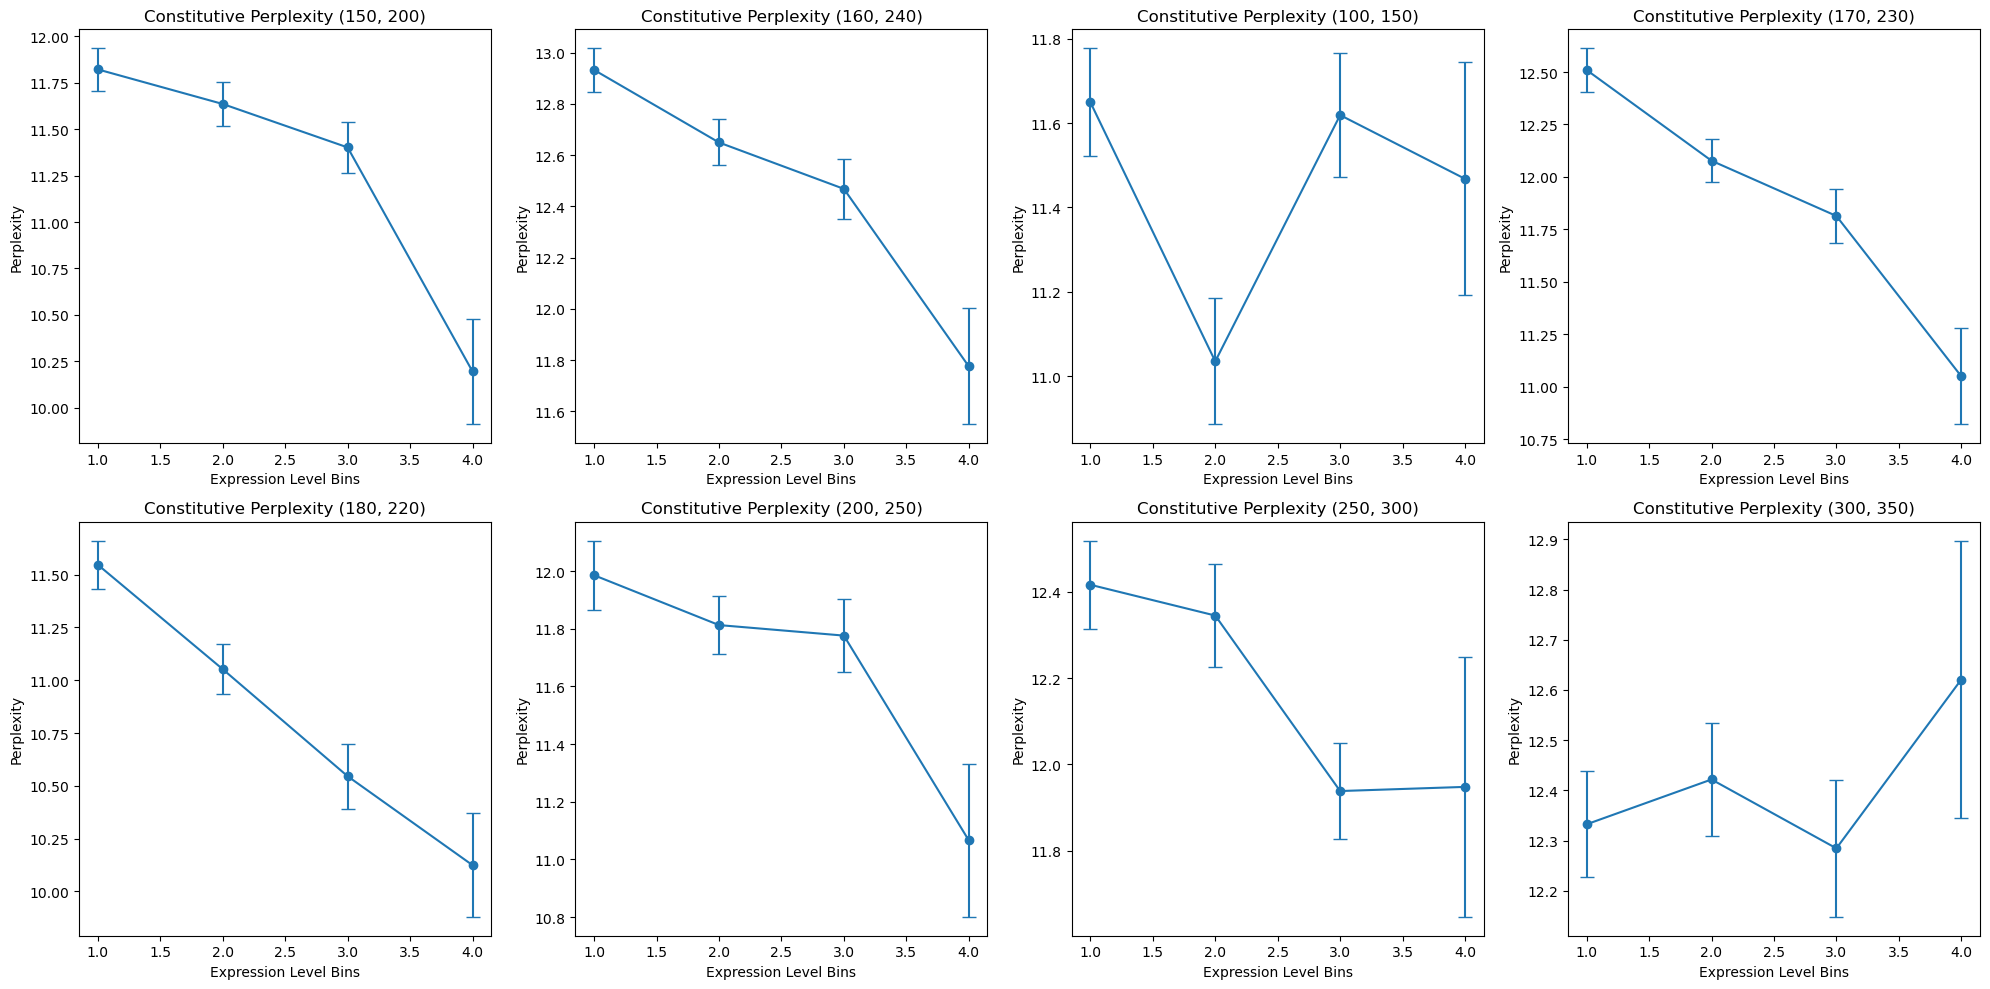

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1276\1439388838.py:118: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 5), gc_means, yerr=gc_errors, fmt='o', capsize=5, linestyle='-', marker='o', color='r')


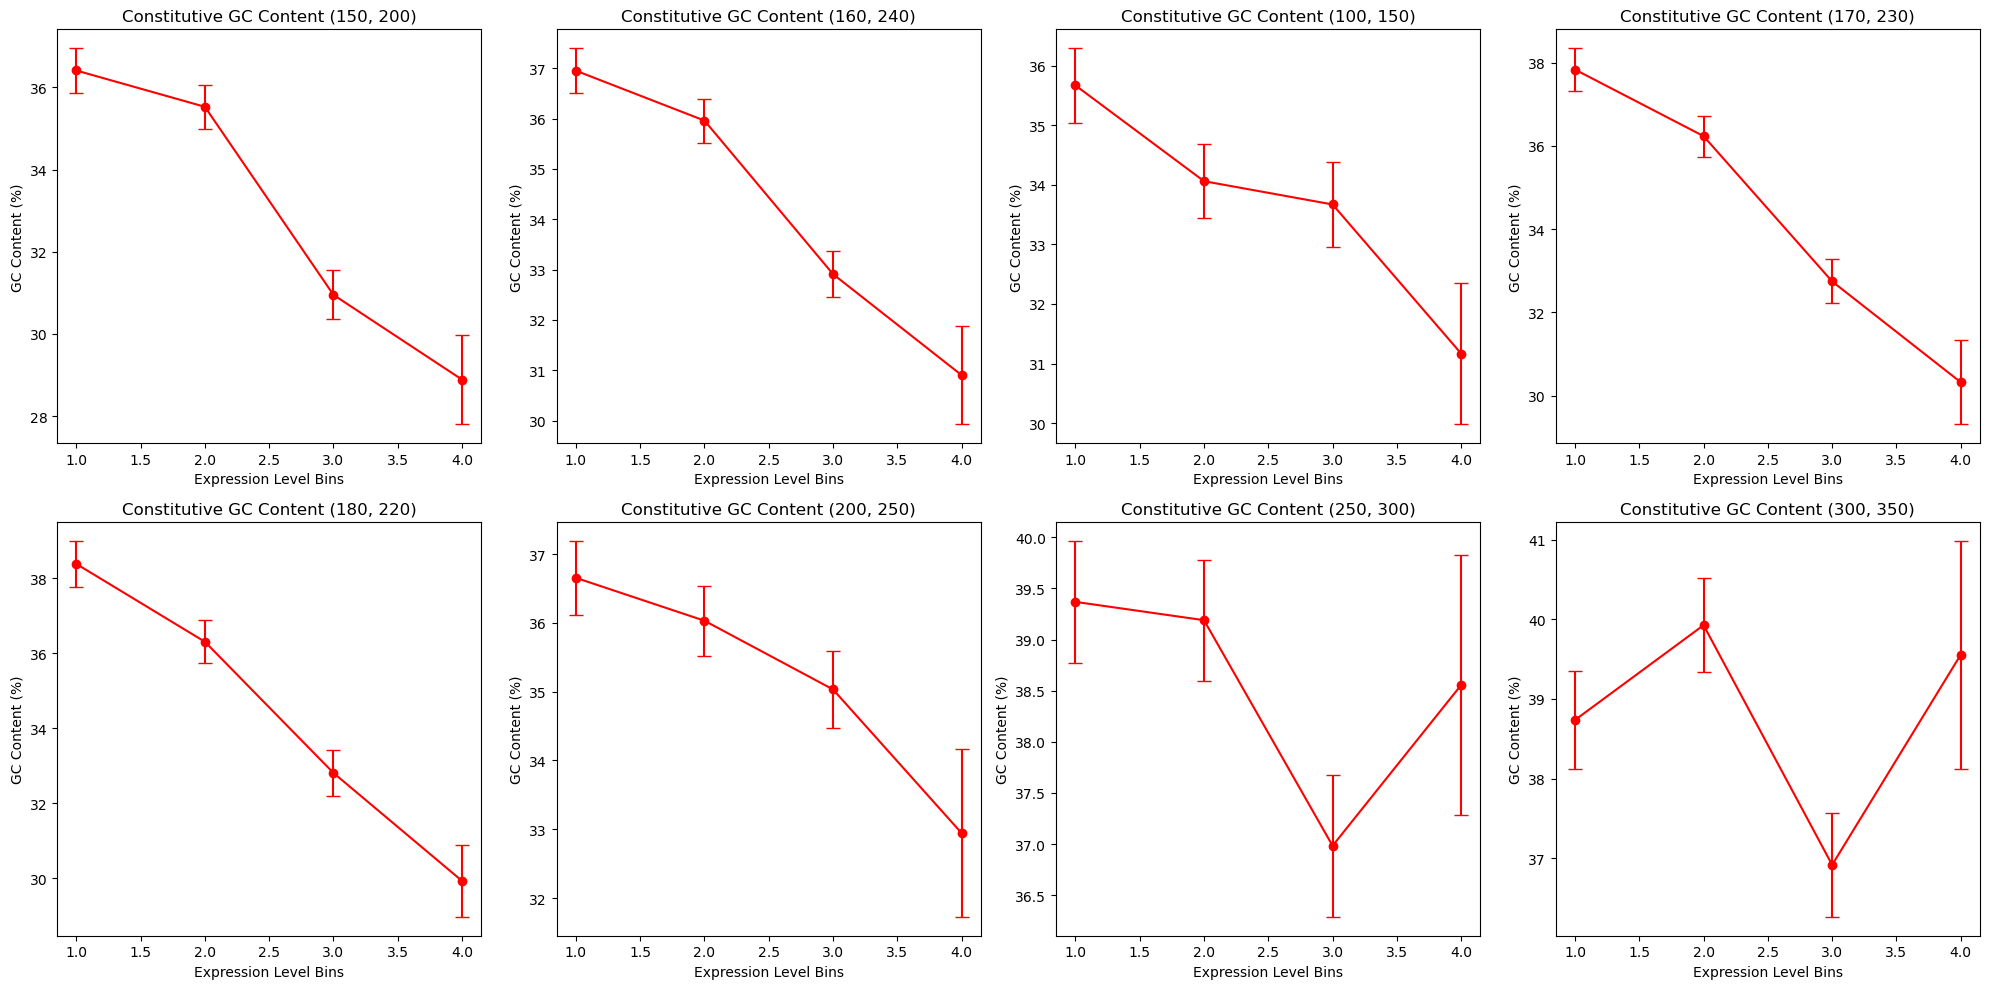

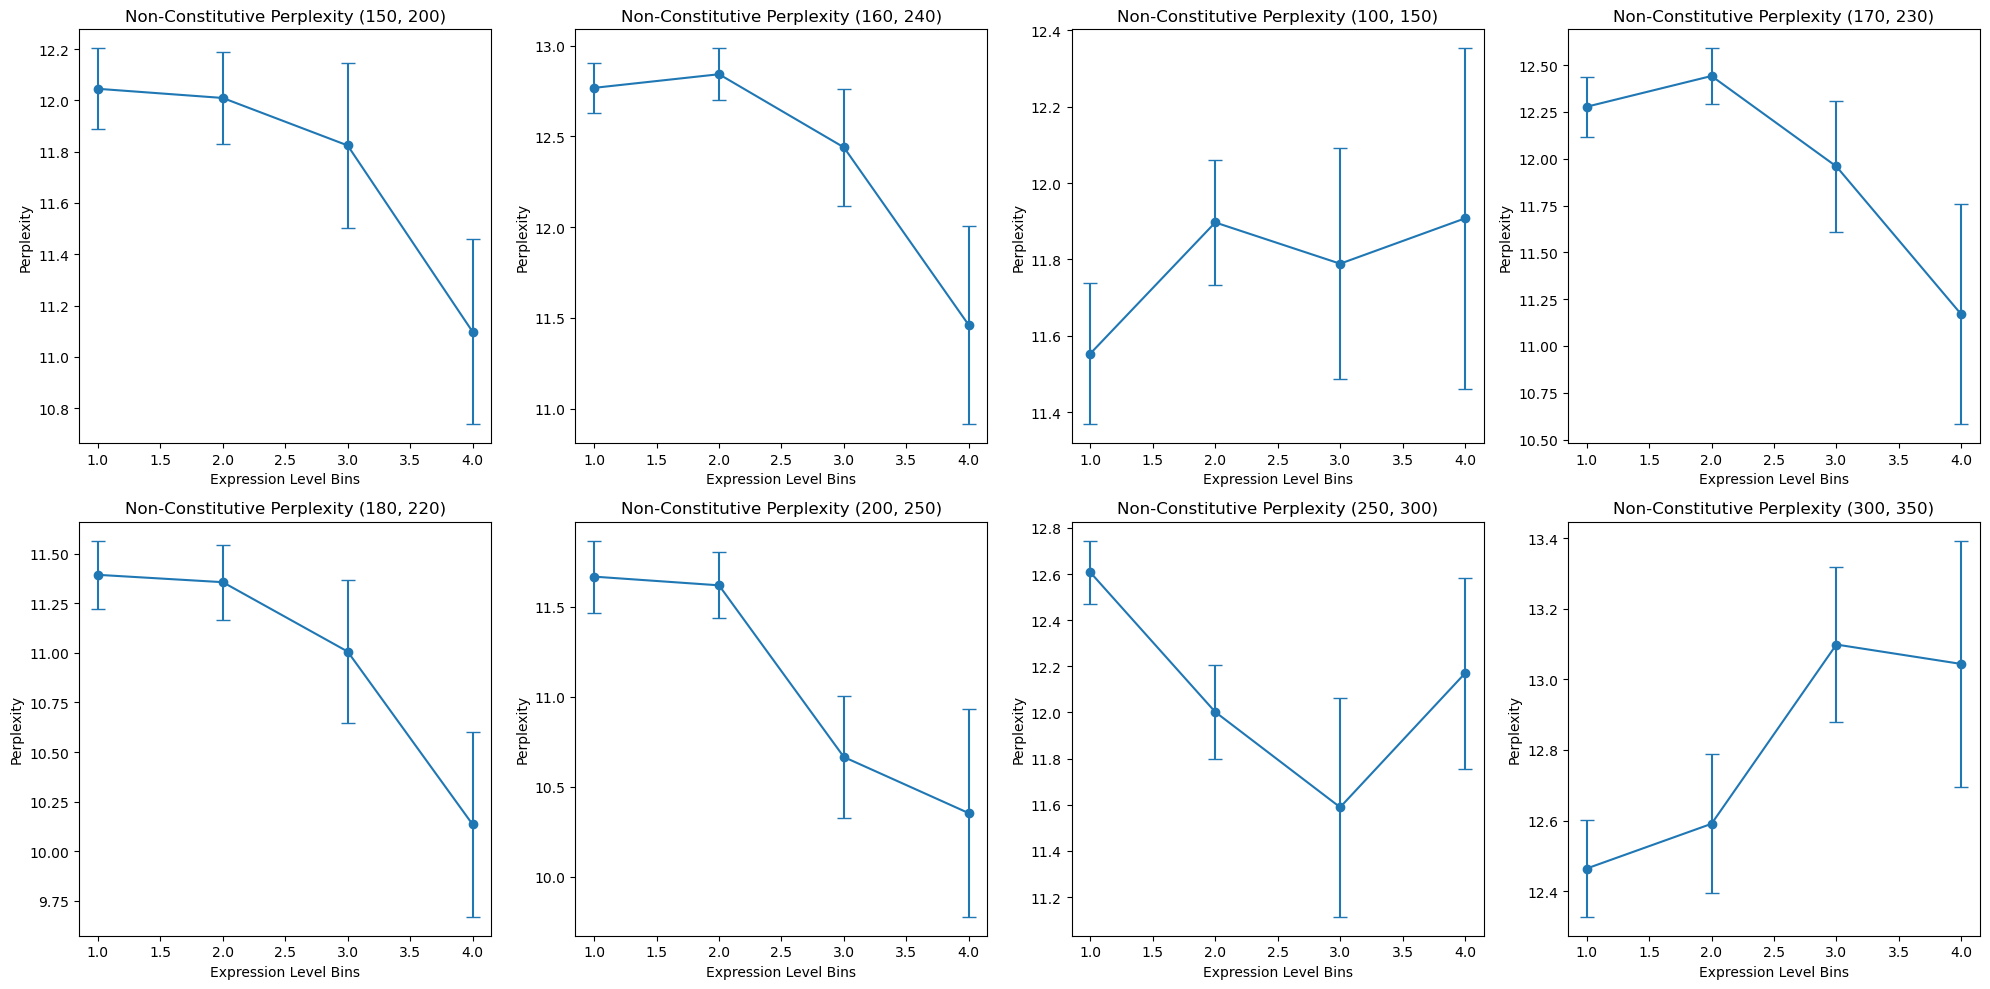

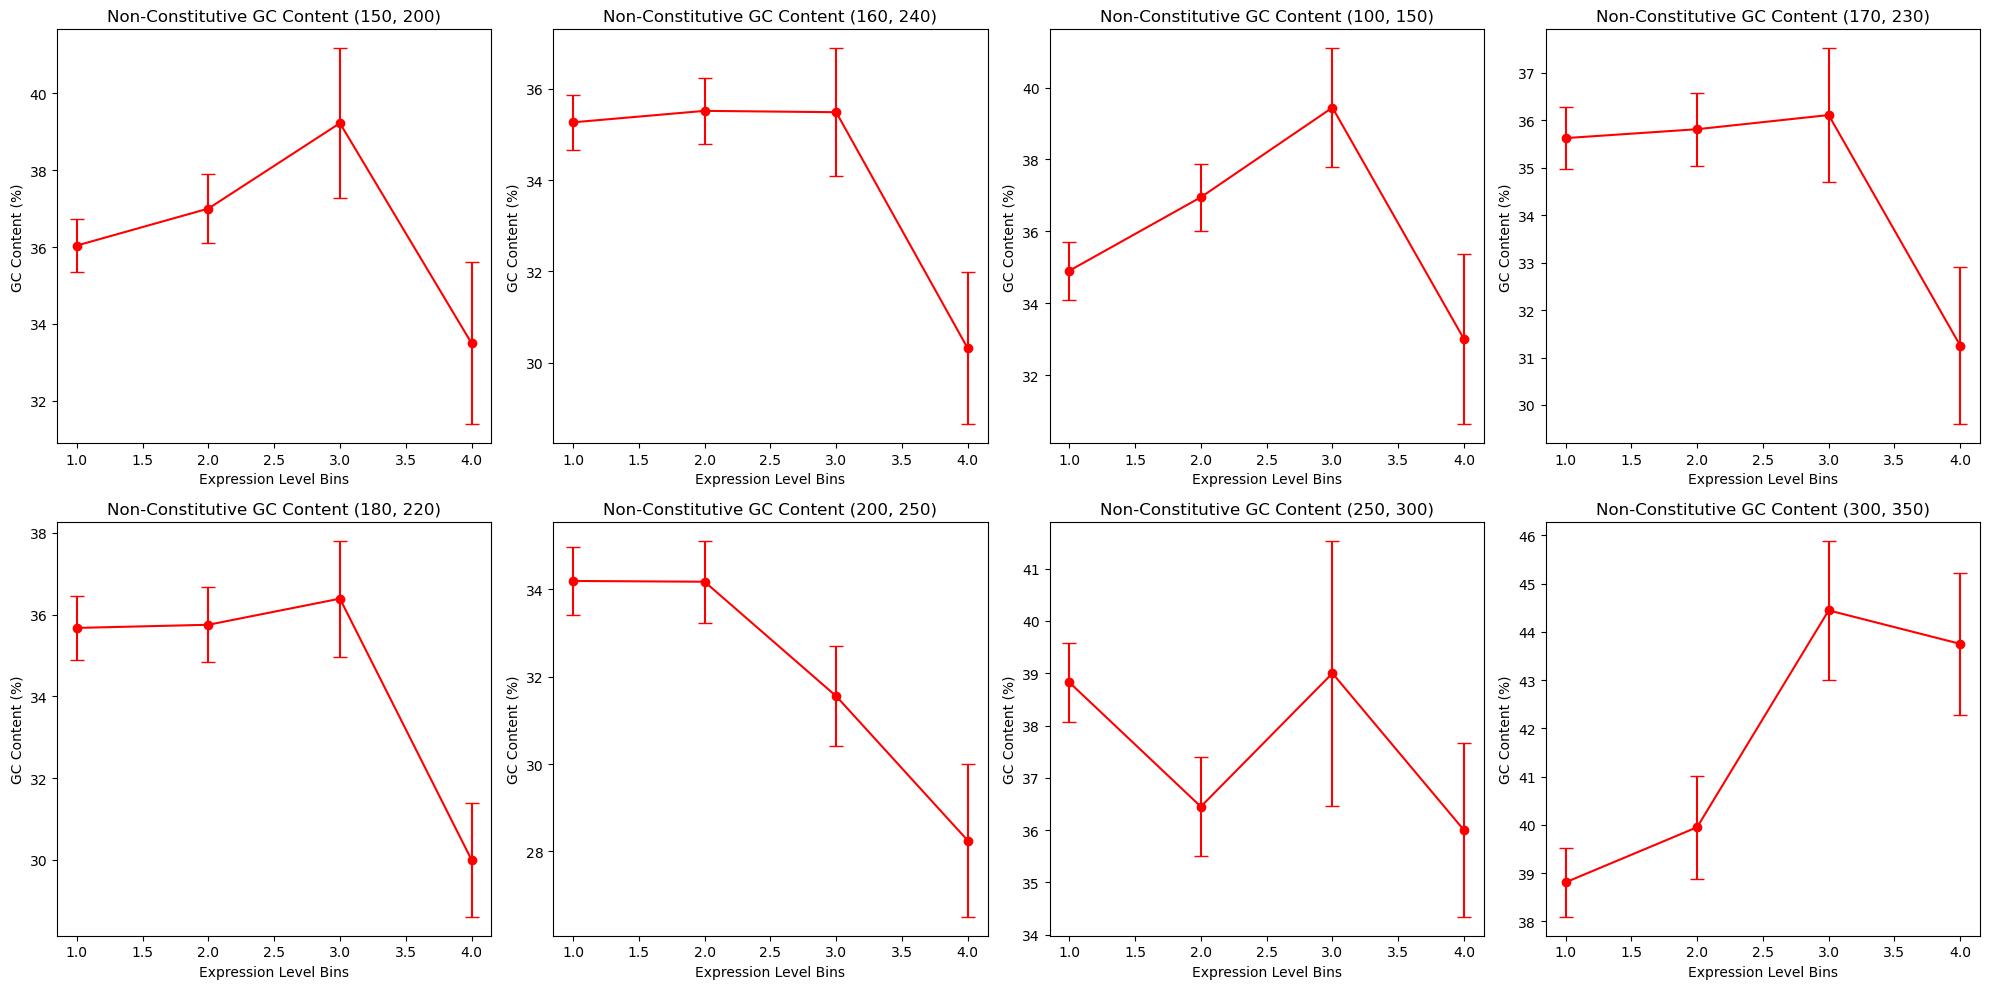

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            emax = float(parts[1])
            is_constitutive = int(parts[2])
            sequence = parts[3]

            if is_constitutive == 1:
                constitutive_data.append((sequence, emax))
            else:
                non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity and GC content for a sequence
def calculate_perplexity_and_gc(seq):
    seq_len = len(seq)
    if seq_len < 20:
        return None, None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    
    # Calculate dinucleotide probabilities
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    # Calculate GC content
    gc_count = seq.count('G') + seq.count('C')
    gc_percentage = (gc_count / seq_len) * 100

    return perplexity, gc_percentage

# Function to bin data based on new expression levels
def create_bins_based_on_expression(data):
    bins = {
        'Low Expression': [],
        'Medium Expression': [],
        'High Expression': [],
        'Very High Expression': []
    }

    for seq, emax in data:
        if emax < 0.1:
            bins['Low Expression'].append((seq, emax))
        elif 0.1 <= emax < 0.4:
            bins['Medium Expression'].append((seq, emax))
        elif 0.4 <= emax < 1.0:
            bins['High Expression'].append((seq, emax))
        else:  # emax >= 1.0
            bins['Very High Expression'].append((seq, emax))

    return [bins[key] for key in bins]

# Function to calculate mean, standard error, and separate perplexity and GC content
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []
    gc_means = []
    gc_errors = []

    for bin_data in bins:
        perplexities = []
        gc_contents = []
        for seq, _ in bin_data:
            perplexity, gc_content = calculate_perplexity_and_gc(seq)
            if perplexity is not None and gc_content is not None:
                perplexities.append(perplexity)
                gc_contents.append(gc_content)

        if perplexities and gc_contents:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))
            gc_means.append(np.mean(gc_contents))
            gc_errors.append(np.std(gc_contents) / np.sqrt(len(gc_contents)))

    return perplexity_means, perplexity_errors, gc_means, gc_errors

# Function to plot the data in a matrix of subplots for multiple regions
def plot_statistics_matrix(region_data, title_prefix):
    num_regions = len(region_data)
    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors, gc_means, gc_errors)) in enumerate(region_data.items()):
        # Perplexity subplot
        axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')
        axs[idx].set_title(f'{title_prefix} Perplexity {region}')
        axs[idx].set_xlabel('Expression Level Bins')
        axs[idx].set_ylabel('Perplexity')

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors, gc_means, gc_errors)) in enumerate(region_data.items()):
        # GC Content subplot
        axs[idx].errorbar(range(1, 5), gc_means, yerr=gc_errors, fmt='o', capsize=5, linestyle='-', marker='o', color='r')
        axs[idx].set_title(f'{title_prefix} GC Content {region}')
        axs[idx].set_xlabel('Expression Level Bins')
        axs[idx].set_ylabel('GC Content (%)')

    plt.tight_layout()
    plt.show()

# Function to process the sequences for multiple regions and plot results
def process_sequences_and_plot_multiple_regions(filename, regions):
    const_data, non_const_data = read_sequences_and_emax(filename)

    region_data_const = {}
    region_data_non_const = {}

    for region in regions:
        region_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in const_data if len(seq) >= region[1]]
        region_non_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in non_const_data if len(seq) >= region[1]]

        const_bins = create_bins_based_on_expression(region_const_data)
        non_const_bins = create_bins_based_on_expression(region_non_const_data)

        region_data_const[region] = calculate_bin_statistics(const_bins)
        region_data_non_const[region] = calculate_bin_statistics(non_const_bins)

    plot_statistics_matrix(region_data_const, 'Constitutive')
    plot_statistics_matrix(region_data_non_const, 'Non-Constitutive')

# Define the regions to analyze
regions = [(150, 200), (160, 240), (100, 150), (170, 230), (180, 220), (200, 250), (250, 300), (300, 350)]

# Run the analysis for yeast.txt with multiple regions
process_sequences_and_plot_multiple_regions('yeast.txt', regions)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1276\3077716563.py:95: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')


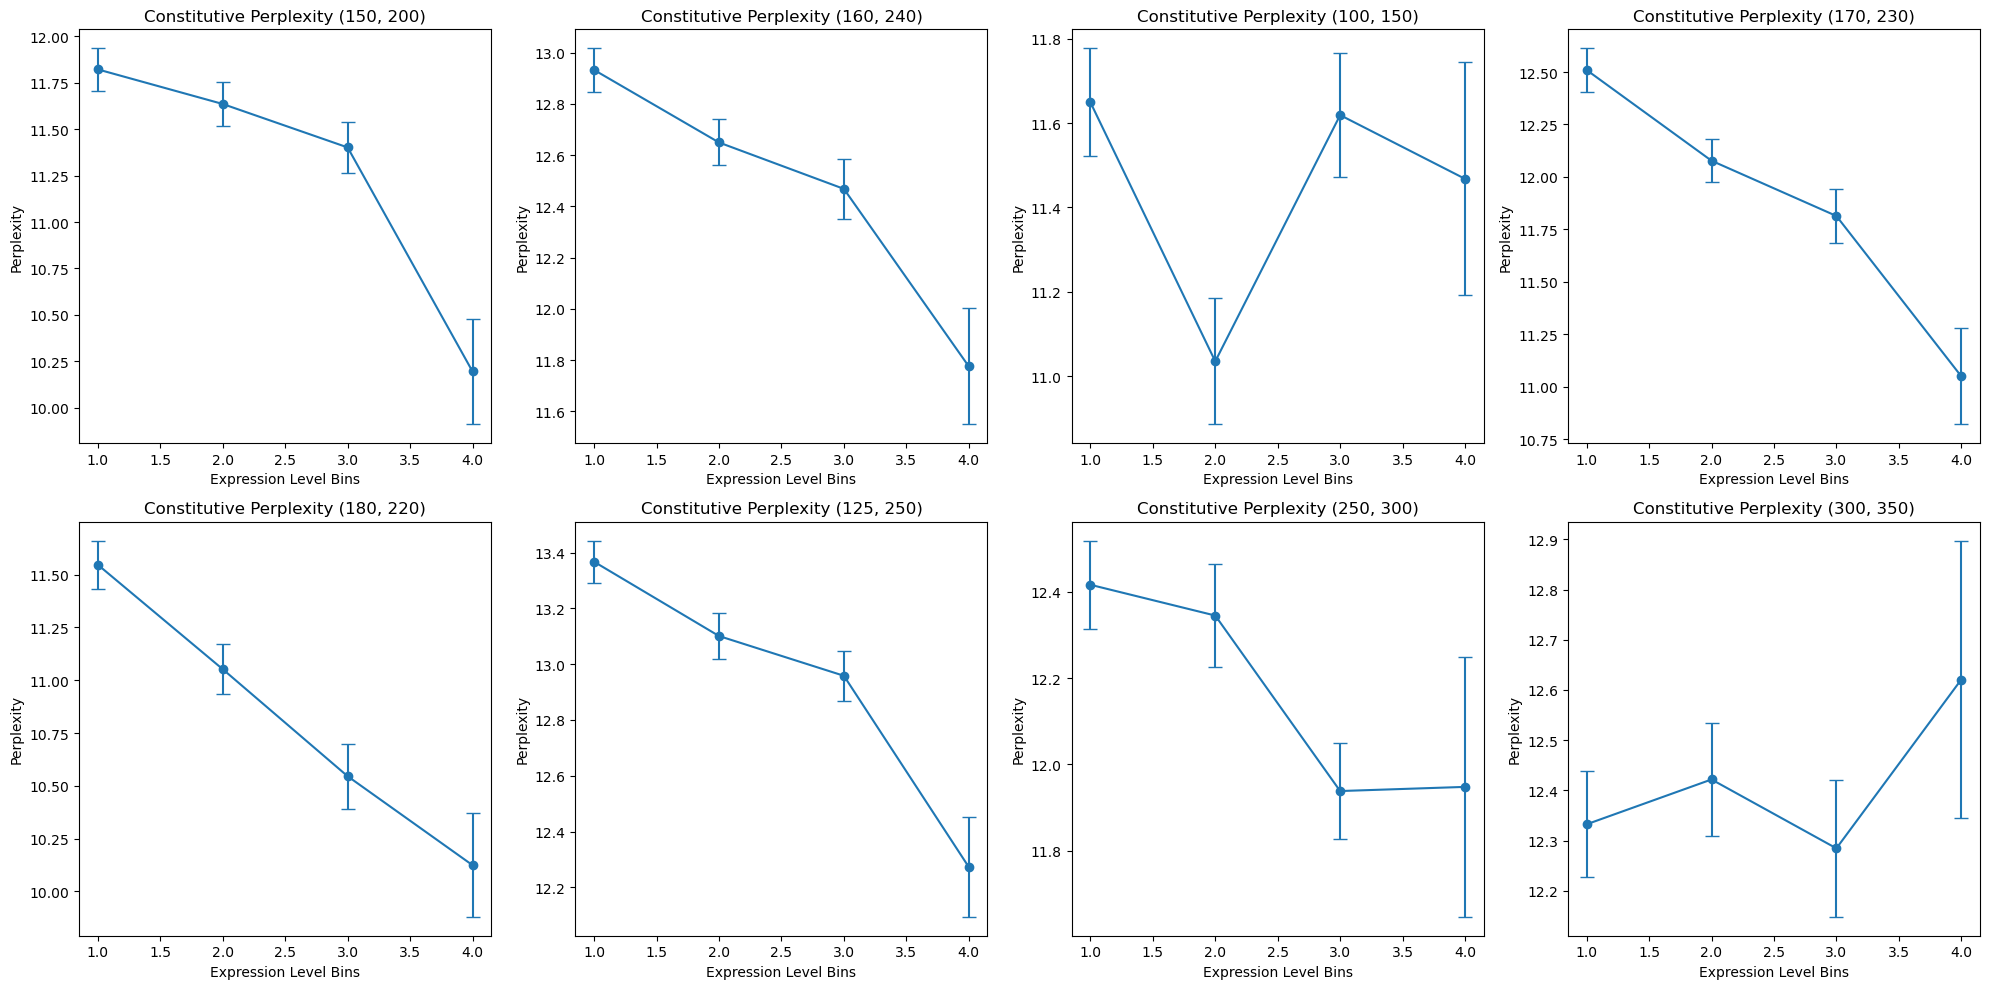

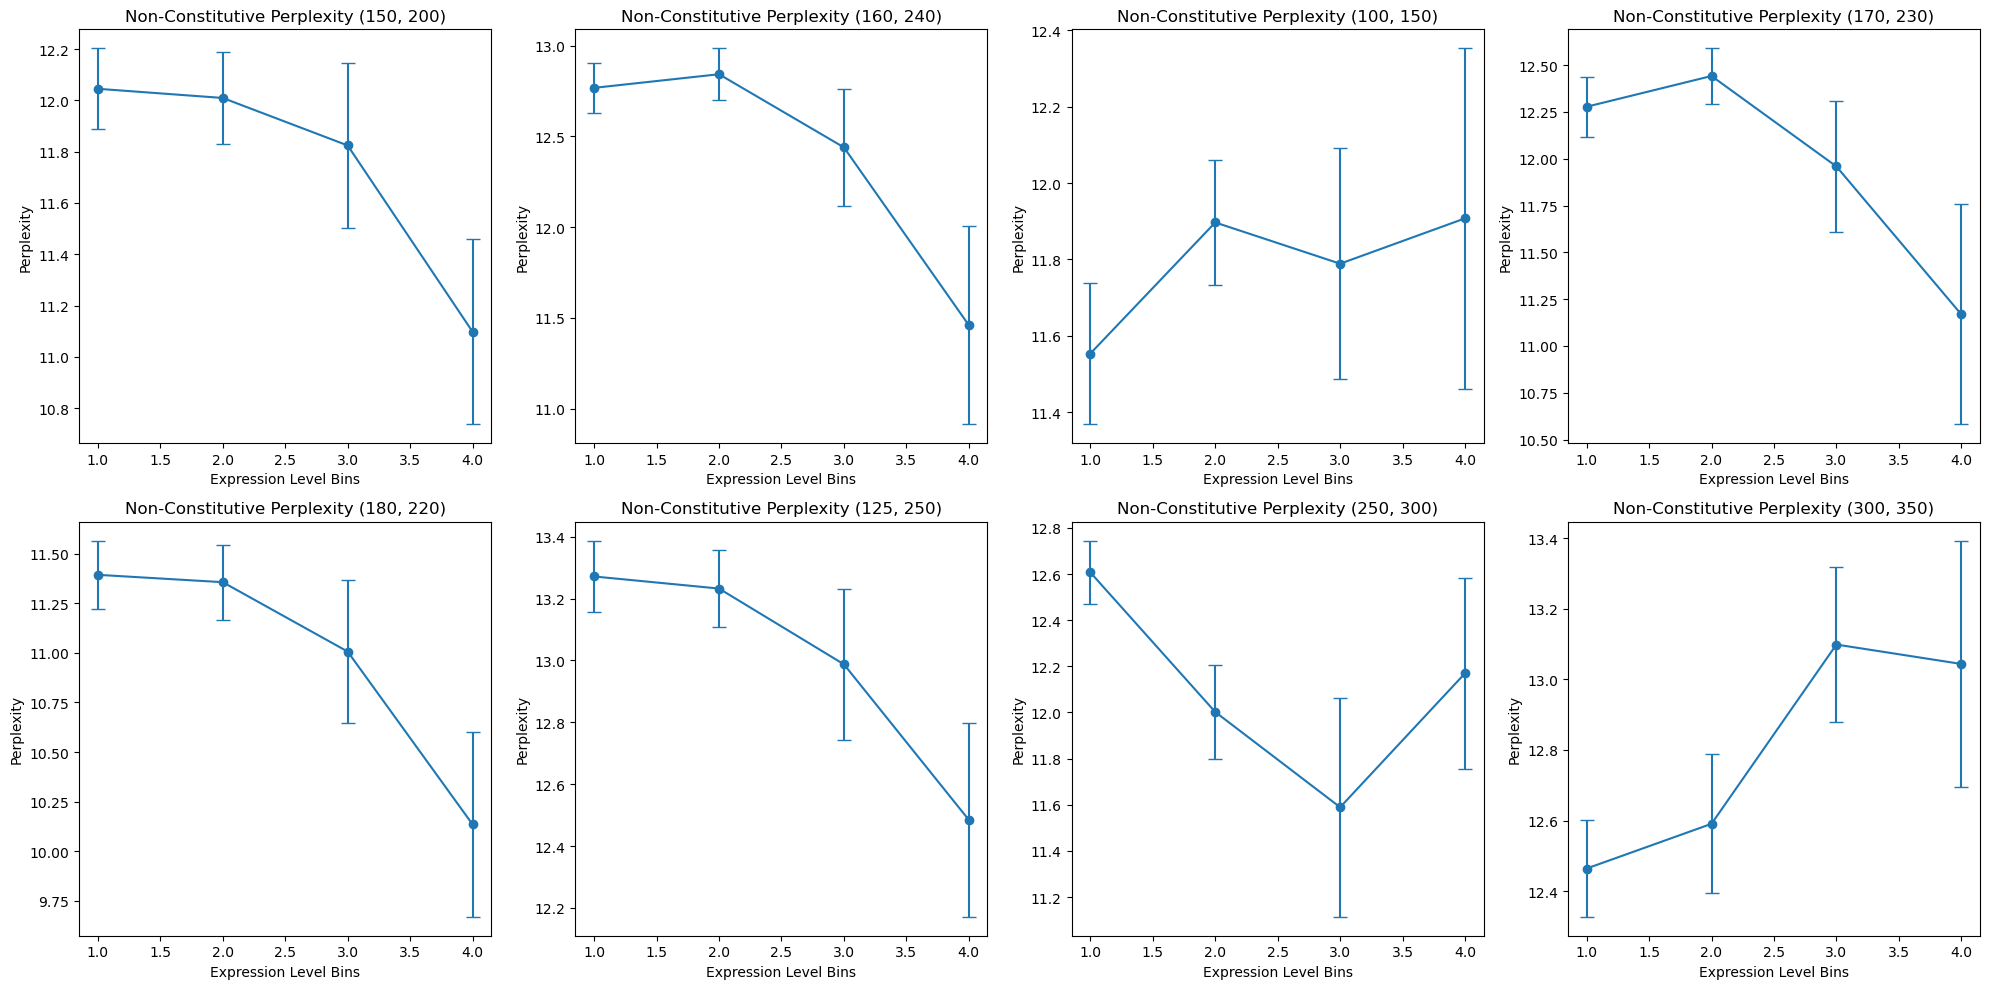

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            emax = float(parts[1])
            is_constitutive = int(parts[2])
            sequence = parts[3]

            if is_constitutive == 1:
                constitutive_data.append((sequence, emax))
            else:
                non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity for a sequence
def calculate_perplexity(seq):
    seq_len = len(seq)
    if seq_len < 20:
        return None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    
    # Calculate dinucleotide probabilities
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    return perplexity

# Function to bin data based on new expression levels
def create_bins_based_on_expression(data):
    bins = {
        'Low Expression': [],
        'Medium Expression': [],
        'High Expression': [],
        'Very High Expression': []
    }

    for seq, emax in data:
        if emax < 0.1:
            bins['Low Expression'].append((seq, emax))
        elif 0.1 <= emax < 0.4:
            bins['Medium Expression'].append((seq, emax))
        elif 0.4 <= emax < 1.0:
            bins['High Expression'].append((seq, emax))
        else:  # emax >= 1.0
            bins['Very High Expression'].append((seq, emax))

    return [bins[key] for key in bins]

# Function to calculate mean and standard error for perplexity
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []

    for bin_data in bins:
        perplexities = []
        for seq, _ in bin_data:
            perplexity = calculate_perplexity(seq)
            if perplexity is not None:
                perplexities.append(perplexity)

        if perplexities:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))

    return perplexity_means, perplexity_errors

# Function to plot the data in a matrix of subplots for multiple regions
def plot_statistics_matrix(region_data, title_prefix):
    num_regions = len(region_data)
    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors)) in enumerate(region_data.items()):
        # Perplexity subplot
        axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')
        axs[idx].set_title(f'{title_prefix} Perplexity {region}')
        axs[idx].set_xlabel('Expression Level Bins')
        axs[idx].set_ylabel('Perplexity')

    plt.tight_layout()
    plt.show()

# Function to process the sequences for multiple regions and plot results
def process_sequences_and_plot_multiple_regions(filename, regions):
    const_data, non_const_data = read_sequences_and_emax(filename)

    region_data_const = {}
    region_data_non_const = {}

    for region in regions:
        region_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in const_data if len(seq) >= region[1]]
        region_non_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in non_const_data if len(seq) >= region[1]]

        const_bins = create_bins_based_on_expression(region_const_data)
        non_const_bins = create_bins_based_on_expression(region_non_const_data)

        region_data_const[region] = calculate_bin_statistics(const_bins)
        region_data_non_const[region] = calculate_bin_statistics(non_const_bins)

    plot_statistics_matrix(region_data_const, 'Constitutive')
    plot_statistics_matrix(region_data_non_const, 'Non-Constitutive')

# Define the regions to analyze
regions = [(150, 200), (160, 240), (100, 150), (170, 230), (180, 220), (125, 250), (250, 300), (300, 350)]

# Run the analysis for yeast.txt with multiple regions
process_sequences_and_plot_multiple_regions('yeast.txt', regions)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1276\3532497823.py:97: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')


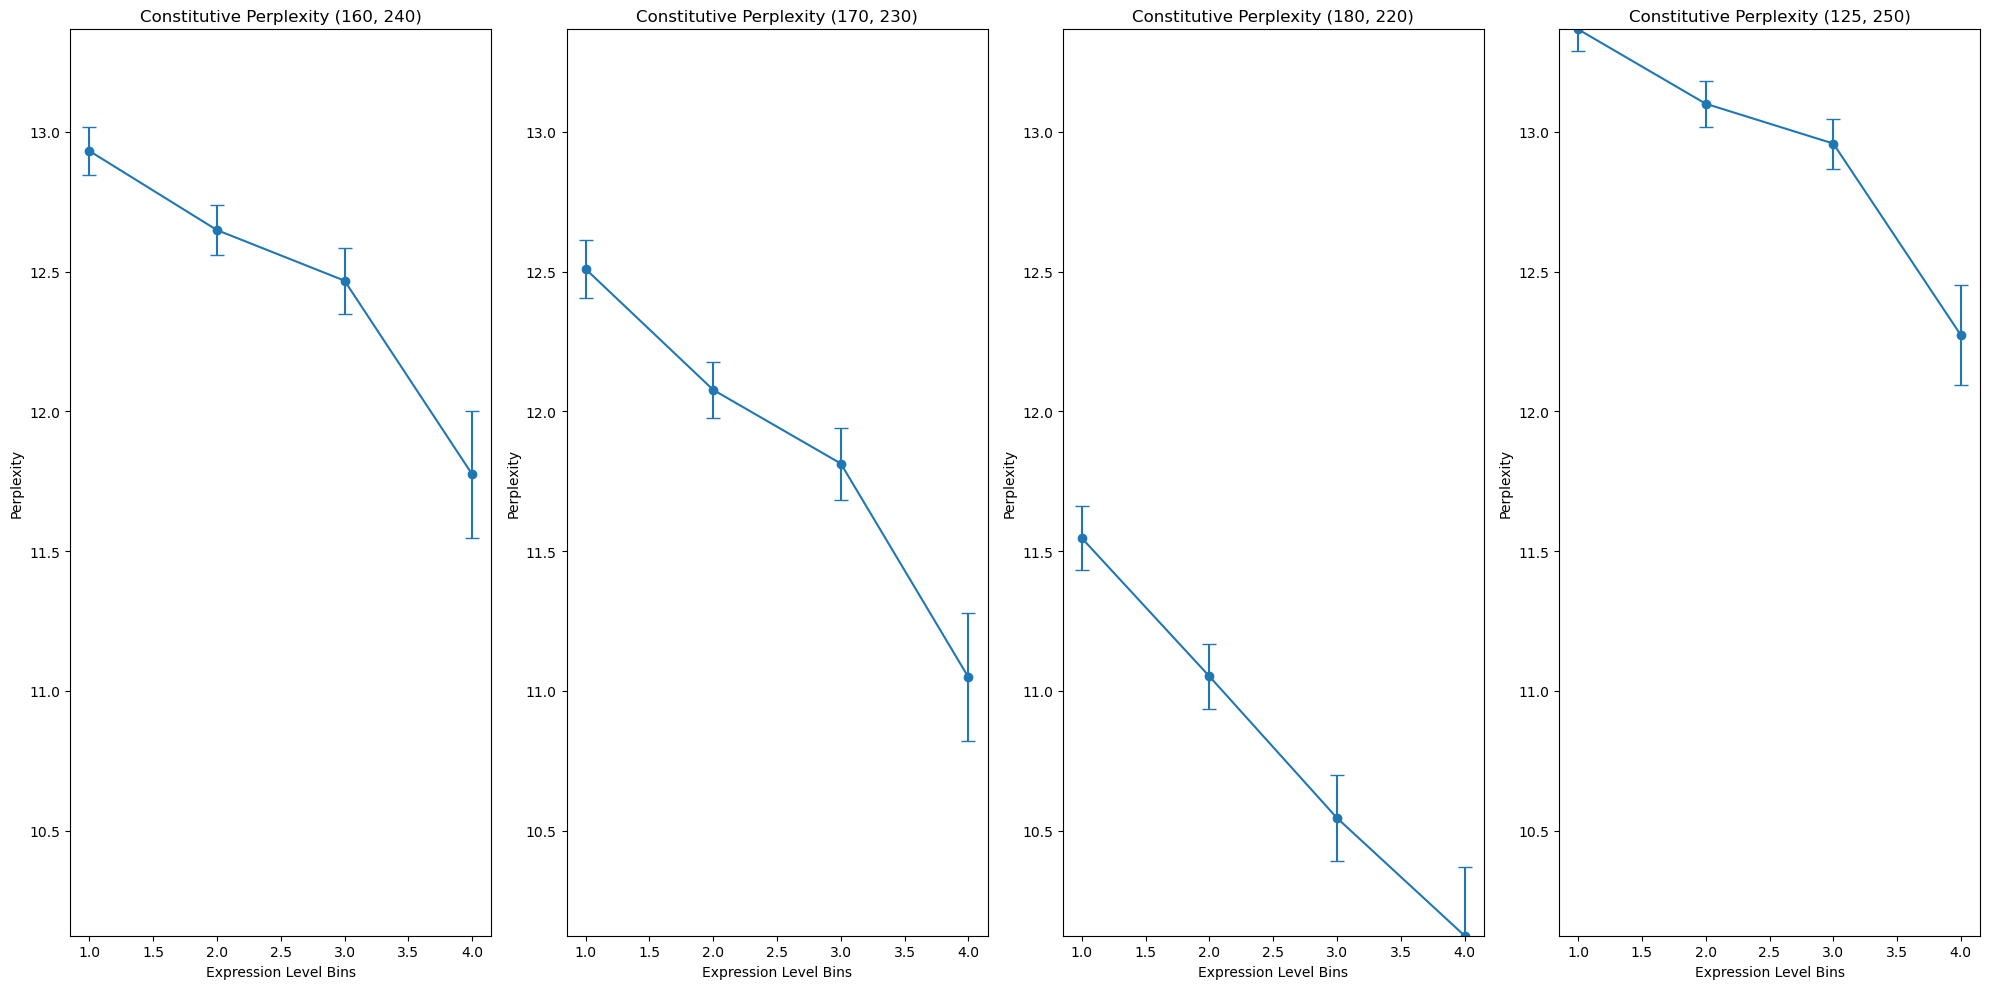

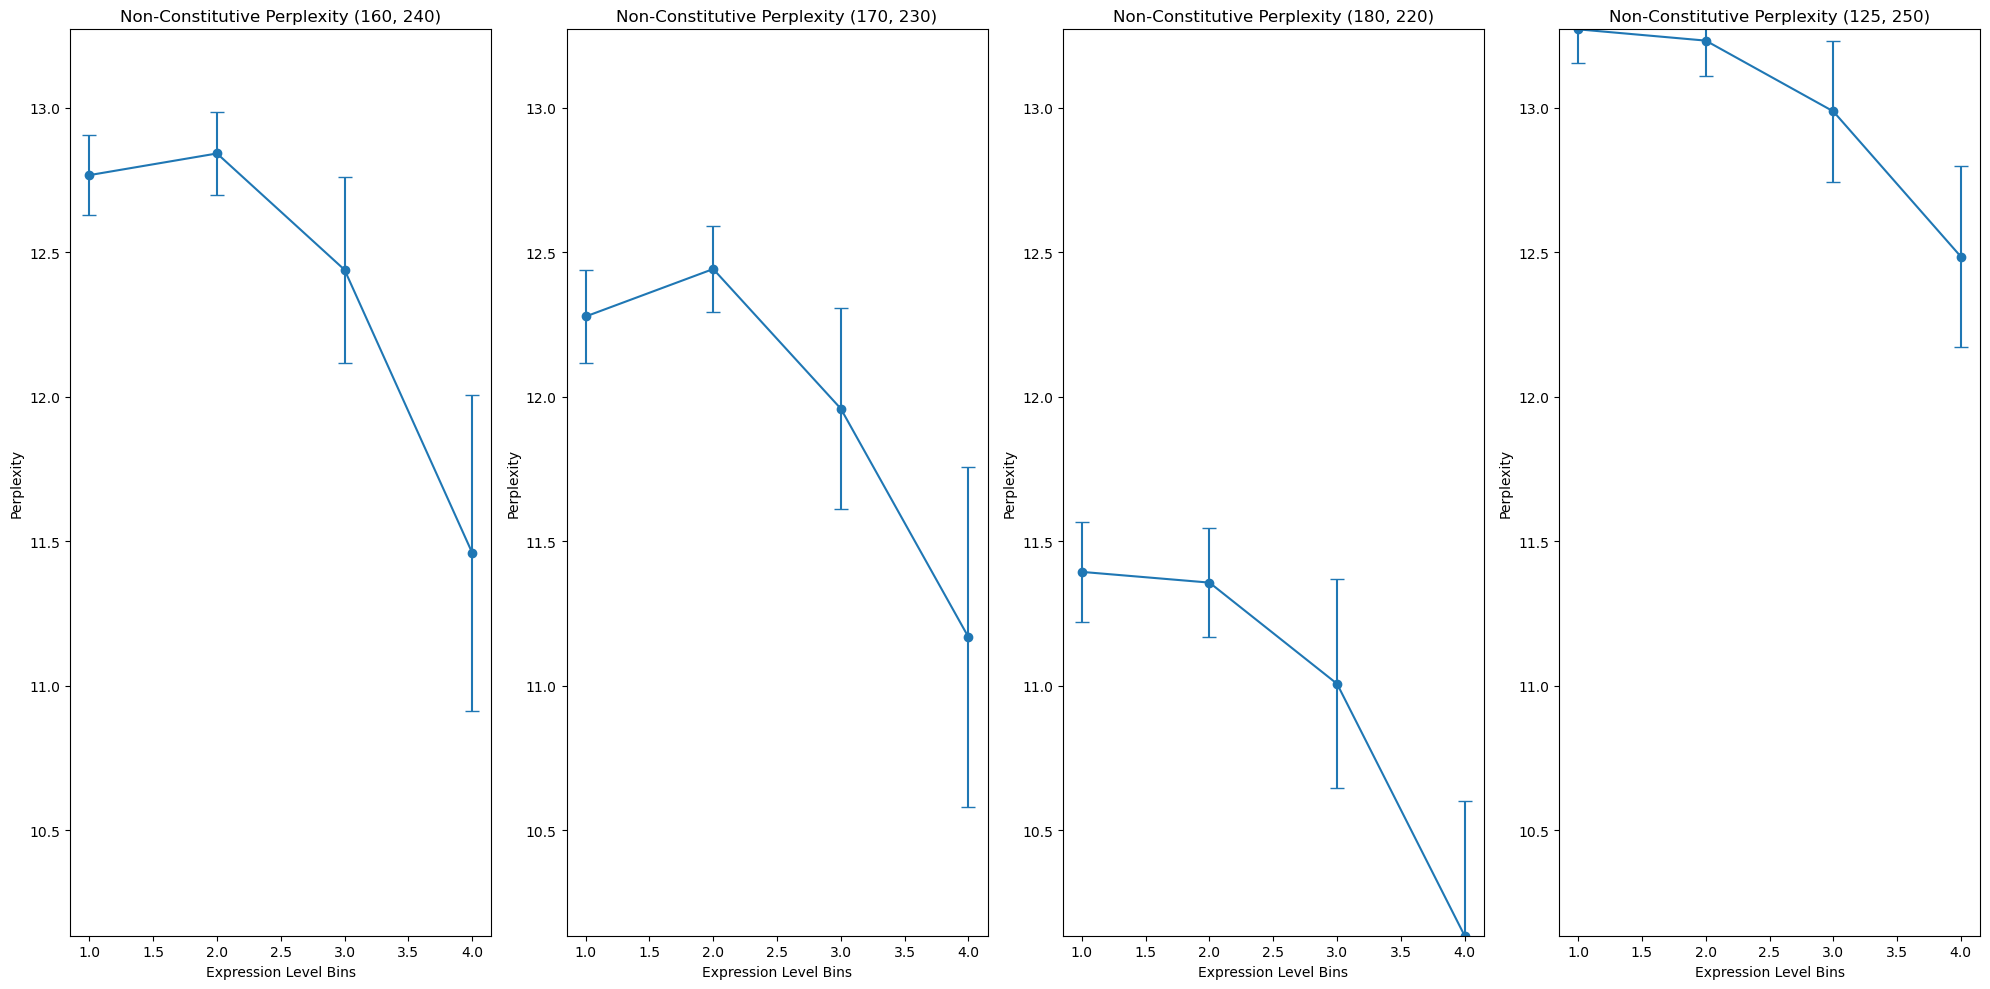

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            emax = float(parts[1])
            is_constitutive = int(parts[2])
            sequence = parts[3]

            if is_constitutive == 1:
                constitutive_data.append((sequence, emax))
            else:
                non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity for a sequence
def calculate_perplexity(seq):
    seq_len = len(seq)
    if seq_len < 20:
        return None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    return perplexity

# Function to bin data based on new expression levels
def create_bins_based_on_expression(data):
    bins = {
        'Low Expression': [],
        'Medium Expression': [],
        'High Expression': [],
        'Very High Expression': []
    }

    for seq, emax in data:
        if emax < 0.1:
            bins['Low Expression'].append((seq, emax))
        elif 0.1 <= emax < 0.4:
            bins['Medium Expression'].append((seq, emax))
        elif 0.4 <= emax < 1.0:
            bins['High Expression'].append((seq, emax))
        else:  # emax >= 1.0
            bins['Very High Expression'].append((seq, emax))

    return [bins[key] for key in bins]

# Function to calculate mean and standard error for perplexity
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []

    for bin_data in bins:
        perplexities = []
        for seq, _ in bin_data:
            perplexity = calculate_perplexity(seq)
            if perplexity is not None:
                perplexities.append(perplexity)

        if perplexities:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))

    return perplexity_means, perplexity_errors

# Function to plot the data in a matrix of subplots with the same y-axis limits
def plot_statistics_matrix(region_data, title_prefix):
    # Find global min and max perplexity values for consistent y-axis
    all_perplexities = [value for _, (means, _) in region_data.items() for value in means if value is not None]
    global_min, global_max = min(all_perplexities), max(all_perplexities)

    num_regions = len(region_data)
    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors)) in enumerate(region_data.items()):
        # Perplexity subplot
        axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')
        axs[idx].set_title(f'{title_prefix} Perplexity {region}')
        axs[idx].set_xlabel('Expression Level Bins')
        axs[idx].set_ylabel('Perplexity')
        axs[idx].set_ylim(global_min, global_max)  # Set y-axis limits

    plt.tight_layout()
    plt.show()

# Function to process the sequences for multiple regions and plot results
def process_sequences_and_plot_multiple_regions(filename, regions):
    const_data, non_const_data = read_sequences_and_emax(filename)

    region_data_const = {}
    region_data_non_const = {}

    for region in regions:
        region_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in const_data if len(seq) >= region[1]]
        region_non_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in non_const_data if len(seq) >= region[1]]

        const_bins = create_bins_based_on_expression(region_const_data)
        non_const_bins = create_bins_based_on_expression(region_non_const_data)

        region_data_const[region] = calculate_bin_statistics(const_bins)
        region_data_non_const[region] = calculate_bin_statistics(non_const_bins)

    plot_statistics_matrix(region_data_const, 'Constitutive')
    plot_statistics_matrix(region_data_non_const, 'Non-Constitutive')

# Define the regions to analyze
regions = [(160, 240),  (170, 230), (180, 220), (125, 250)]

# Run the analysis for yeast.txt with multiple regions
process_sequences_and_plot_multiple_regions('yeast.txt', regions)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1276\2851510335.py:97: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')


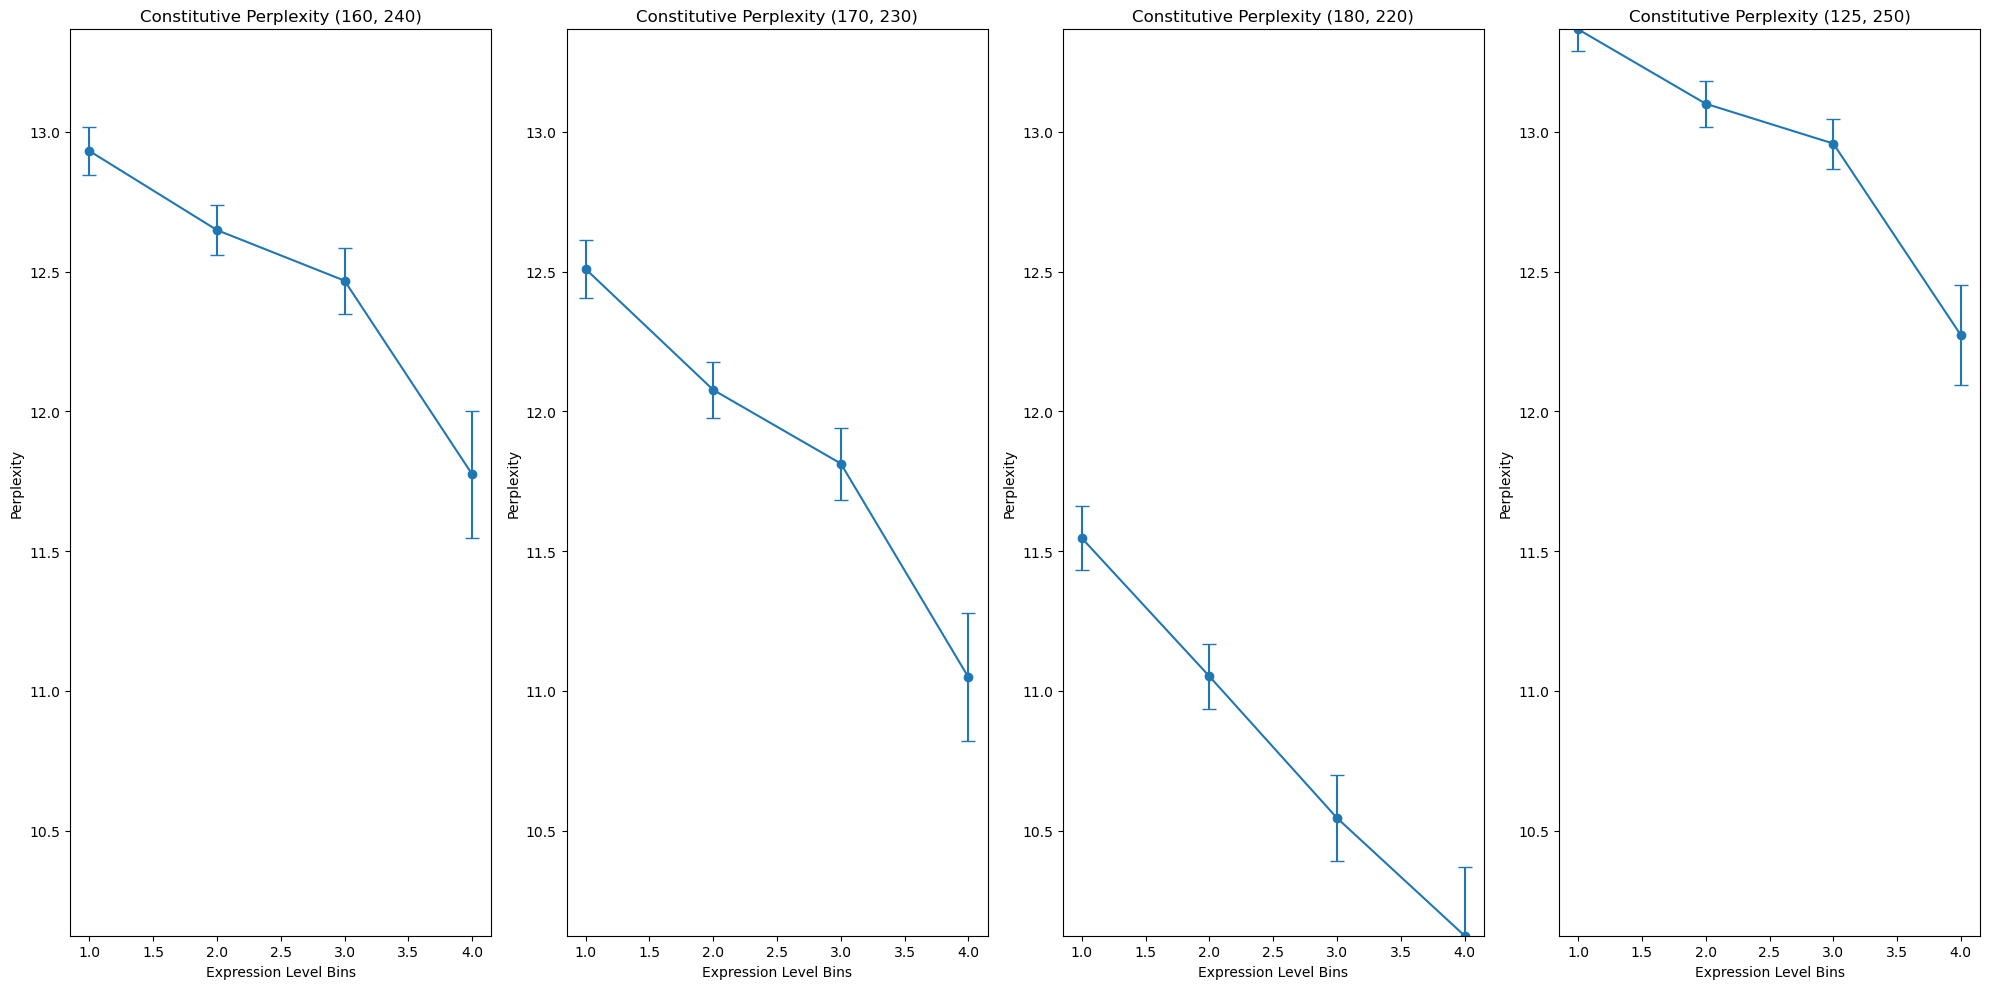

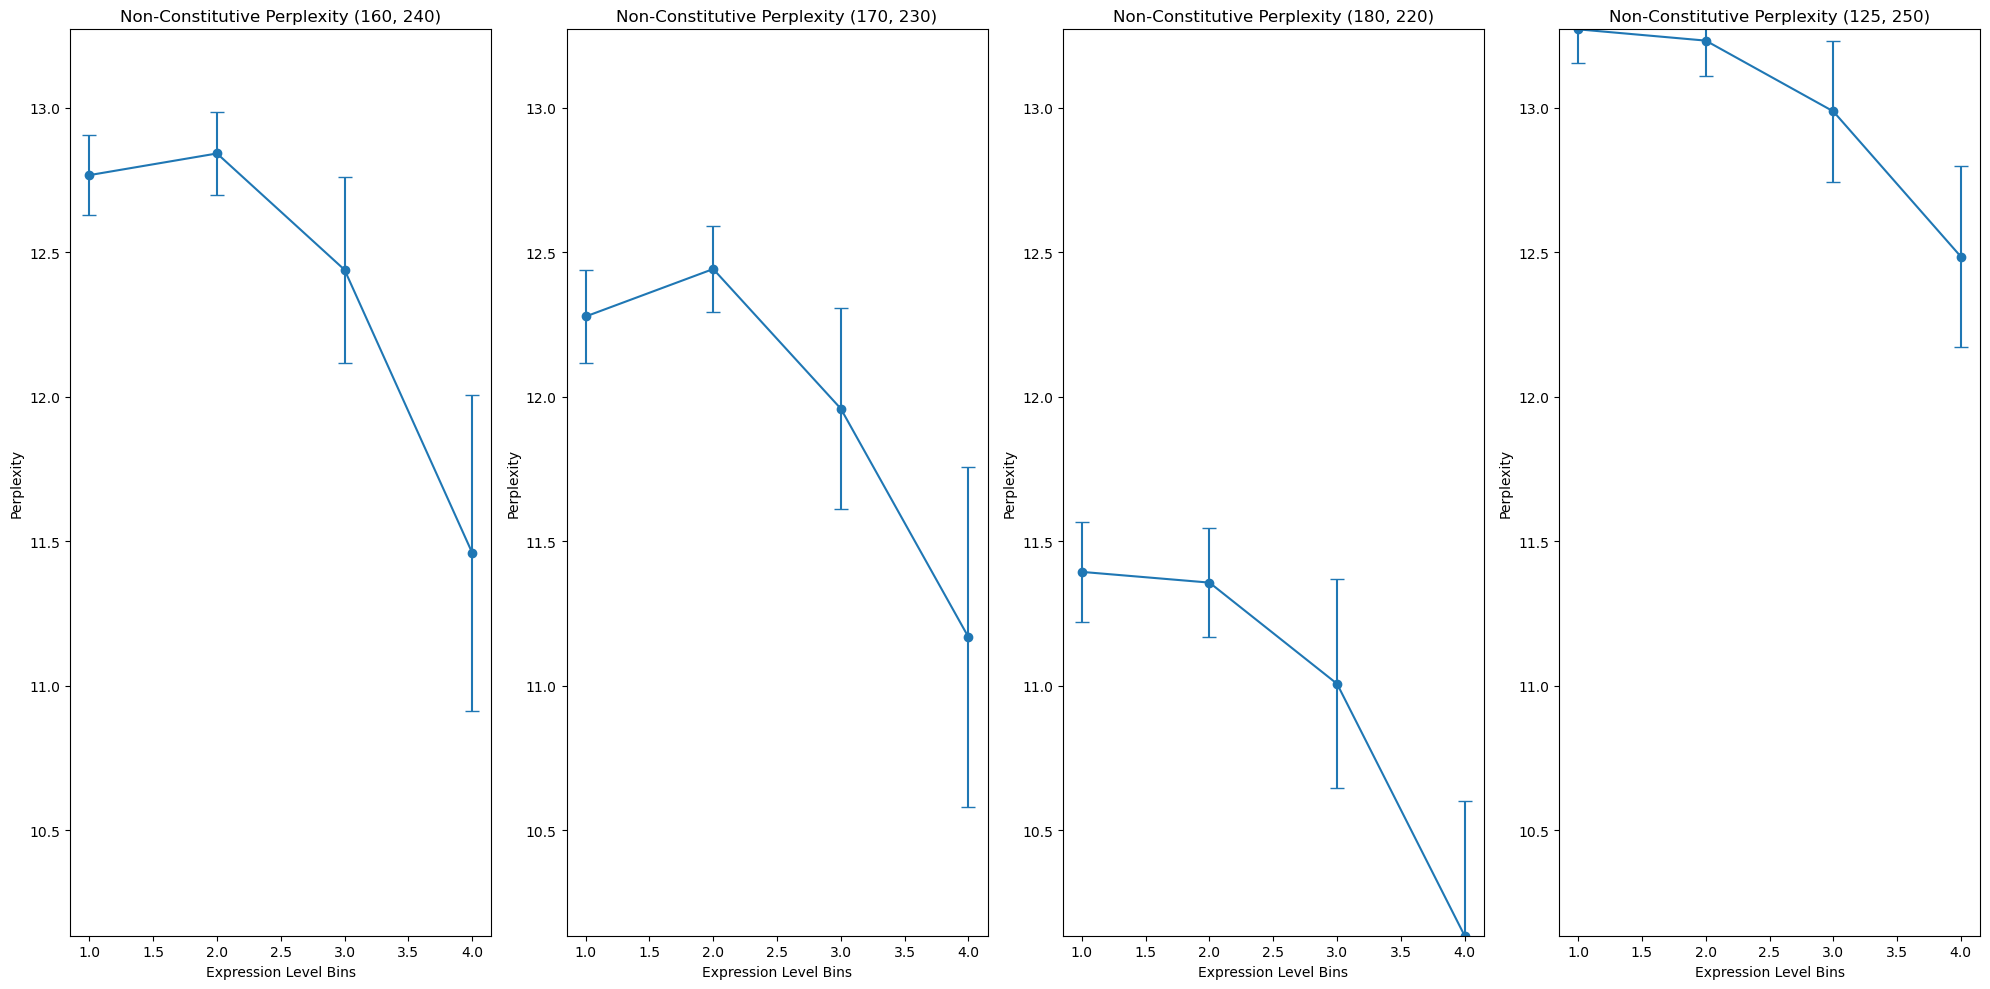

Results saved to 'perplexity_results.xlsx'


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            emax = float(parts[1])
            is_constitutive = int(parts[2])
            sequence = parts[3]

            if is_constitutive == 1:
                constitutive_data.append((sequence, emax))
            else:
                non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity for a sequence
def calculate_perplexity(seq):
    seq_len = len(seq)
    if seq_len < 20:
        return None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    return perplexity

# Function to bin data based on new expression levels
def create_bins_based_on_expression(data):
    bins = {
        'Low Expression': [],
        'Medium Expression': [],
        'High Expression': [],
        'Very High Expression': []
    }

    for seq, emax in data:
        if emax < 0.1:
            bins['Low Expression'].append((seq, emax))
        elif 0.1 <= emax < 0.4:
            bins['Medium Expression'].append((seq, emax))
        elif 0.4 <= emax < 1.0:
            bins['High Expression'].append((seq, emax))
        else:  # emax >= 1.0
            bins['Very High Expression'].append((seq, emax))

    return [bins[key] for key in bins]

# Function to calculate mean and standard error for perplexity
def calculate_bin_statistics(bins):
    perplexity_means = []
    perplexity_errors = []

    for bin_data in bins:
        perplexities = []
        for seq, _ in bin_data:
            perplexity = calculate_perplexity(seq)
            if perplexity is not None:
                perplexities.append(perplexity)

        if perplexities:
            # Calculate mean and standard error
            perplexity_means.append(np.mean(perplexities))
            perplexity_errors.append(np.std(perplexities) / np.sqrt(len(perplexities)))

    return perplexity_means, perplexity_errors

# Function to plot the data in a matrix of subplots with the same y-axis limits
def plot_statistics_matrix(region_data, title_prefix):
    # Find global min and max perplexity values for consistent y-axis
    all_perplexities = [value for _, (means, _) in region_data.items() for value in means if value is not None]
    global_min, global_max = min(all_perplexities), max(all_perplexities)

    num_regions = len(region_data)
    fig, axs = plt.subplots(nrows=(num_regions + 3) // 4, ncols=4, figsize=(20, 10))
    axs = axs.flatten()

    for idx, (region, (perplexity_means, perplexity_errors)) in enumerate(region_data.items()):
        # Perplexity subplot
        axs[idx].errorbar(range(1, 5), perplexity_means, yerr=perplexity_errors, fmt='o', capsize=5, linestyle='-', marker='o')
        axs[idx].set_title(f'{title_prefix} Perplexity {region}')
        axs[idx].set_xlabel('Expression Level Bins')
        axs[idx].set_ylabel('Perplexity')
        axs[idx].set_ylim(global_min, global_max)  # Set y-axis limits

    plt.tight_layout()
    plt.show()

# Function to process the sequences for multiple regions, plot results, and save to Excel
def process_sequences_and_plot_multiple_regions(filename, regions):
    const_data, non_const_data = read_sequences_and_emax(filename)

    region_data_const = {}
    region_data_non_const = {}
    results_const = []
    results_non_const = []

    for region in regions:
        region_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in const_data if len(seq) >= region[1]]
        region_non_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in non_const_data if len(seq) >= region[1]]

        const_bins = create_bins_based_on_expression(region_const_data)
        non_const_bins = create_bins_based_on_expression(region_non_const_data)

        perplexity_means_const, perplexity_errors_const = calculate_bin_statistics(const_bins)
        perplexity_means_non_const, perplexity_errors_non_const = calculate_bin_statistics(non_const_bins)

        region_data_const[region] = (perplexity_means_const, perplexity_errors_const)
        region_data_non_const[region] = (perplexity_means_non_const, perplexity_errors_non_const)

        results_const.append([region] + perplexity_means_const)
        results_non_const.append([region] + perplexity_means_non_const)

    # Plot statistics
    plot_statistics_matrix(region_data_const, 'Constitutive')
    plot_statistics_matrix(region_data_non_const, 'Non-Constitutive')

    # Save results to Excel
    df_const = pd.DataFrame(results_const, columns=['Region'] + ['Bin ' + str(i) for i in range(1, 5)])
    df_non_const = pd.DataFrame(results_non_const, columns=['Region'] + ['Bin ' + str(i) for i in range(1, 5)])

    with pd.ExcelWriter('perplexity_results.xlsx') as writer:
        df_const.to_excel(writer, sheet_name='Constitutive', index=False)
        df_non_const.to_excel(writer, sheet_name='Non-Constitutive', index=False)

    print("Results saved to 'perplexity_results.xlsx'")

# Define the regions to analyze
regions = [(160, 240), (170, 230), (180, 220), (125, 250)]

# Run the analysis for yeast.txt with multiple regions
process_sequences_and_plot_multiple_regions('yeast.txt', regions)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to read sequences, E_max values, and separate them based on Is_Constitutive
def read_sequences_and_emax(filename):
    constitutive_data = []
    non_constitutive_data = []

    with open(filename, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 4:
                continue

            emax = float(parts[1])
            is_constitutive = int(parts[2])
            sequence = parts[3]

            if is_constitutive == 1:
                constitutive_data.append((sequence, emax))
            else:
                non_constitutive_data.append((sequence, emax))

    return constitutive_data, non_constitutive_data

# Function to calculate dinucleotide perplexity for a sequence
def calculate_perplexity(seq):
    seq_len = len(seq)
    if seq_len < 20:
        return None

    dinucleotides = [seq[i:i + 2] for i in range(seq_len - 1)]
    dinucleotide_counts = Counter(dinucleotides).values()
    probabilities = np.array(list(dinucleotide_counts)) / (seq_len - 1)

    # Calculate entropy and perplexity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    perplexity = 2 ** entropy

    return perplexity

# Function to bin data based on new expression levels
def create_bins_based_on_expression(data):
    bins = {
        'Low Expression': [],
        'Medium Expression': [],
        'High Expression': [],
        'Very High Expression': []
    }

    for seq, emax in data:
        if emax < 0.1:
            bins['Low Expression'].append((seq, emax))
        elif 0.1 <= emax < 0.4:
            bins['Medium Expression'].append((seq, emax))
        elif 0.4 <= emax < 1.0:
            bins['High Expression'].append((seq, emax))
        else:  # emax >= 1.0
            bins['Very High Expression'].append((seq, emax))

    return [bins[key] for key in bins]

# Function to gather all perplexity values for each bin
def gather_bin_statistics(bins):
    bin_perplexities = []

    for bin_data in bins:
        perplexities = []
        for seq, _ in bin_data:
            perplexity = calculate_perplexity(seq)
            if perplexity is not None:
                perplexities.append(perplexity)

        bin_perplexities.append(perplexities)

    return bin_perplexities

# Function to process the sequences for multiple regions and save all values to Excel
def process_sequences_and_save_all_values(filename, regions):
    const_data, non_const_data = read_sequences_and_emax(filename)

    all_values_const = {}
    all_values_non_const = {}

    for region in regions:
        region_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in const_data if len(seq) >= region[1]]
        region_non_const_data = [(seq[region[0]:region[1]], emax) for seq, emax in non_const_data if len(seq) >= region[1]]

        const_bins = create_bins_based_on_expression(region_const_data)
        non_const_bins = create_bins_based_on_expression(region_non_const_data)

        all_values_const[region] = gather_bin_statistics(const_bins)
        all_values_non_const[region] = gather_bin_statistics(non_const_bins)

    # Convert data to a format suitable for saving to Excel
    data_const = []
    data_non_const = []

    for region in regions:
        for bin_index, values in enumerate(all_values_const[region]):
            for value in values:
                data_const.append([f'Region {region}', f'Bin {bin_index + 1}', value])

        for bin_index, values in enumerate(all_values_non_const[region]):
            for value in values:
                data_non_const.append([f'Region {region}', f'Bin {bin_index + 1}', value])

    # Create DataFrames
    df_const = pd.DataFrame(data_const, columns=['Region', 'Bin', 'emax','Perplexity'])
    df_non_const = pd.DataFrame(data_non_const, columns=['Region', 'Bin', 'emax', 'Perplexity'])

    # Save to Excel
    with pd.ExcelWriter('all_perplexity_values.xlsx') as writer:
        df_const.to_excel(writer, sheet_name='Constitutive', index=False)
        df_non_const.to_excel(writer, sheet_name='Non-Constitutive', index=False)

    print("All values saved to 'all_perplexity_values.xlsx'")

# Define the regions to analyze
regions = [(125, 250)]

# Run the analysis for yeast.txt with multiple regions
process_sequences_and_save_all_values('yeast.txt', regions)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

